**Final Project - 02805 Social Graphs and Interactions, DTU, autumn 2020**

**Erla Hrafnkelsdóttir, Fanndís Kristinsdóttir and Rebekka Ormslev**

# Most Powerful Women in the World

## **1. Motivation**

   * **What is your dataset?**
    
    <font color = 'mediumBlue'> The data for the project is gathered from three sources. Using the Forbes lists from 2004 to find the most powerful women a list of 153 have been found, since women often appear more than once on the list. The website Little Sis is used to gather all the relationship these women have with important organizations. When creating the network for the project each women will be representeed with a node, but nodes also consist of companies, businesses, schools and organizations that a woman has a relationship with. The Little sis data alone results in 1400 nodes in the network. Next, the wikipedia pages for the women are gatherd to gain even more connections, if there are more connections available on the wikipedia page then more nodes are creating. The wikipedia pages resulted in about 12.000 more nodes that were added to the network. The final network therefore consists of around 13.000 nodes and 18.000 edges, where and edge represents a connection between the two nodes.
    
    A simple example of a node is Hillary Clinton who is one of the most powerful women. Hillary Clinton has an obvious connection to Bill Clinton, which means that Bill Clinton has now become a node in the network. An edge has now been created between Hillary and Bill. Since Bill is now a node in the network he will both have connections to women and other non-women nodes. In the network there is a connection between Bill Clinton and Barack Obama, since Barack Obama has been added as a node in relation to Michelle Obama who is one the most powerful women.
    
    Text Analysis will be used in the project and since wikipedia pages often tend to be written quite neutral, it has been decided to gather the twitter feeds of the women as well. Unfortunately, only 58 of the women had a verified twitter account but the gathering of their most recent tweets resulted in 111.000 tweets being gathered.
 </font> 

   
   * **Why did you choose this/these particular dataset(s)?**
       
        <font color = 'mediumBlue'> The group consist of three non-powerful women who are inspired by interesting women. After few days of data search this topic kept coming up. As it was quite relevant and a topic which was believed that had not been used before in this course it was decided to analyse it further. To start with, it was a worry how small the network was, by only using littlesis.org as a source. When the group found the data on wikipedia as well it was believed that the network would be big enough to find good results for the goal of the project.

* **What was your goal for the end user's experience?**

    <font color = 'mediumBlue'> The goal of the project is to create a meaningful network and extract interesting information regarding the connections of the women.


## **2. Basic stats. Let's understand the dataset better**

   * **Write about your choices in data cleaning and preprocessing**
   
   <font color ='mediumBlue'> MISSING TEXT

   * **Write a short section that discusses the dataset stats (here you can recycle the work you did for Project Assignment A)**
    
    <font color = 'mediumBlue'> SOME INTRO TEXT HERE..
        - Little Sis - 1400 nodes and 2142 edges. The source can be found [here](https://littlesis.org/lists/2687-the-worlds-most-powerful-women-2019/members?fbclid=IwAR1kUKtSH0lN0VMEGJQWvPZUuV9HIOwnsit-fUKYqoUHvkXzwFVeTuZq8r0) 
        - Wiki - 12728 nodes and 16317 edges. The source can be found [here](https://en.wikipedia.org/wiki/Forbes_list_of_The_World%27s_100_Most_Powerful_Women?fbclid=IwAR0uEWFcp81JP-i4uFBpChx0QKf6zj2DaVn3zKqdDQT0SQgiqSsxzwxWb3M)
        - Combined Graph - 13752 nodes and 18242 edges
        - Tweets from 58 women from the lists above - resulting in 110.000 tweets.

<font color = 'mediumBlue'> The data cleansing described above will be done in the following cells.

In [1]:
# Start with required imports
import nltk
import re
import pprint
import os
import string
import nltk, re, pprint
import math
import community
import pandas as pd
import urllib.request
import json
import itertools
import networkx as nx
import community
import wordcloud as wc
import io
import numpy as np
from collections import Counter
from matplotlib import cm
from IPython.core.display import HTML
from nltk import word_tokenize, FreqDist
from collections import Counter
from PIL import Image
from wordcloud import ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set()

# For centering plots and graphs
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

<font color = 'mediumBlue'> Reading in the csv data files from the little sis data source and creating the directed little sis network. A 'Woman' attribute is added to the nodes which correspond the the most powerful women. For consistency and in order to combine graphs from more than one data source, all spaces are replaced with underscore, all dots are removed and all text is made lowercase. The files were collected and can be found in our repository on [github](https://github.com/fanndis/fanndis.github.io/tree/main/worlds_most_powerful_women)

In [2]:
#ATH: remove the path below
path = 'C:/Users/erla/Google Drive/Skóli/DTU/02805 Social graphs and interactions/ProjectAssignment/fanndis.github.io/worlds_most_powerful_women/'
file_path = os.listdir(path)

#creating list which will be used to collect all the women
women_list = []

# Creating little sis network
little_sis_graph = nx.DiGraph()

# Looping through all little sis files, adding nodes and links into the graph
for i in file_path:
    p = path + i
    women_list.append(i[:-4])
    node1 = i[:-4].replace('.','').lower()
    little_sis_graph.add_node(node1, category = "Woman")
    try:
        data = pd.read_csv(p)
        node2_list = list(data['entity2_name']) #entity2 stores all the relationships of the women
        #replacing space with underscore, removing dots and put as lowercase
        node2_list = [i.replace(' ','_').replace('.','').lower() for i in node2_list]
        little_sis_graph.add_nodes_from(node2_list)
        for j in node2_list:
            if i != j:
                little_sis_graph.add_edges_from([(node1, node2) for node2 in node2_list]) 
    except:
        print(f'Didn\'t work for {node1}')

Didn't work for ana_brnabić
Didn't work for andrea_marques_de_almeida
Didn't work for ava_duvernay
Didn't work for dong_mingzhu
Didn't work for eliza_manningham-buller
Didn't work for elvira_nabiullina
Didn't work for jacinda_ardern
Didn't work for jane_jie_sun
Didn't work for jennifer_lee
Didn't work for katharine_viner
Didn't work for lee_boo-jin
Didn't work for margarita_louis-dreyfus
Didn't work for mette_frederiksen
Didn't work for nguyễn_thị_phương_thảo
Didn't work for nirmala_sitharaman
Didn't work for paula_santilli
Didn't work for raja_al_gurg
Didn't work for rania_nashar
Didn't work for rihanna
Didn't work for sahle-work_zewde
Didn't work for sheikh_hasina
Didn't work for taylor_swift
Didn't work for tsai_ing-wen
Didn't work for ursula_von_der_leyen
Didn't work for wang_fengying
Didn't work for zuzana_čaputová


<font color = 'mediumBlue'> As can be seen above, it was not possible to extract information for all the women by using the little sis data source. This is because not all women had information regarding their connections on this website but since wikipedia will also be used, there is a possibility that important information can be extracted from there.
  

Extracting and showing information about the little sis graph below, node count, edge count and then same information for the largest component of the graph.

In [3]:
print(f'Number of nodes in whole network: {little_sis_graph.number_of_nodes()}')
print(f'Number of edges in whole network: {little_sis_graph.number_of_edges()}')

largest_ccls = little_sis_graph.subgraph(max(nx.weakly_connected_components(little_sis_graph), key = len))

print(f'Number of nodes in largest cc: {largest_ccls.number_of_nodes()}')
print(f'Number of edges in largest cc: {largest_ccls.number_of_edges()}')

Number of nodes in whole network: 1400
Number of edges in whole network: 2142
Number of nodes in largest cc: 1284
Number of edges in largest cc: 2072


<font color = 'mediumBlue'> Visualizing the degree distribution of the little sis network.

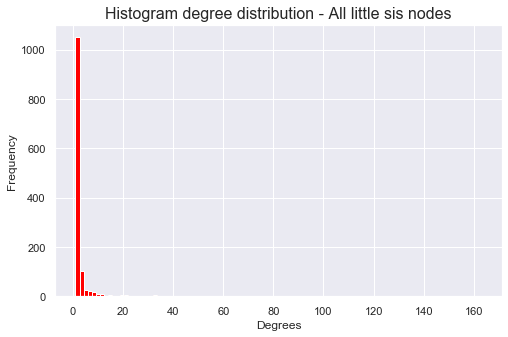

In [4]:
degrees = [largest_ccls.degree(n) for n in largest_ccls.nodes()]

# Constructing a figure of histogram degree distributions
plt.figure(figsize = (8,5))
plt.hist(degrees, bins = 100, color = 'red')
plt.title('Histogram degree distribution - All little sis nodes', fontsize = 16)
plt.xlabel('Degrees')
plt.ylabel('Frequency')
plt.show();

## <font color = 'mediumBlue'> Comment on graph

<font color = 'mediumBlue'> Visualizing Little Sis network with Force Atlas below

100%|██████████| 2000/2000 [04:05<00:00,  8.15it/s]


BarnesHut Approximation  took  21.73  seconds
Repulsion forces  took  213.38  seconds
Gravitational forces  took  0.07  seconds
Attraction forces  took  0.54  seconds
AdjustSpeedAndApplyForces step  took  2.79  seconds


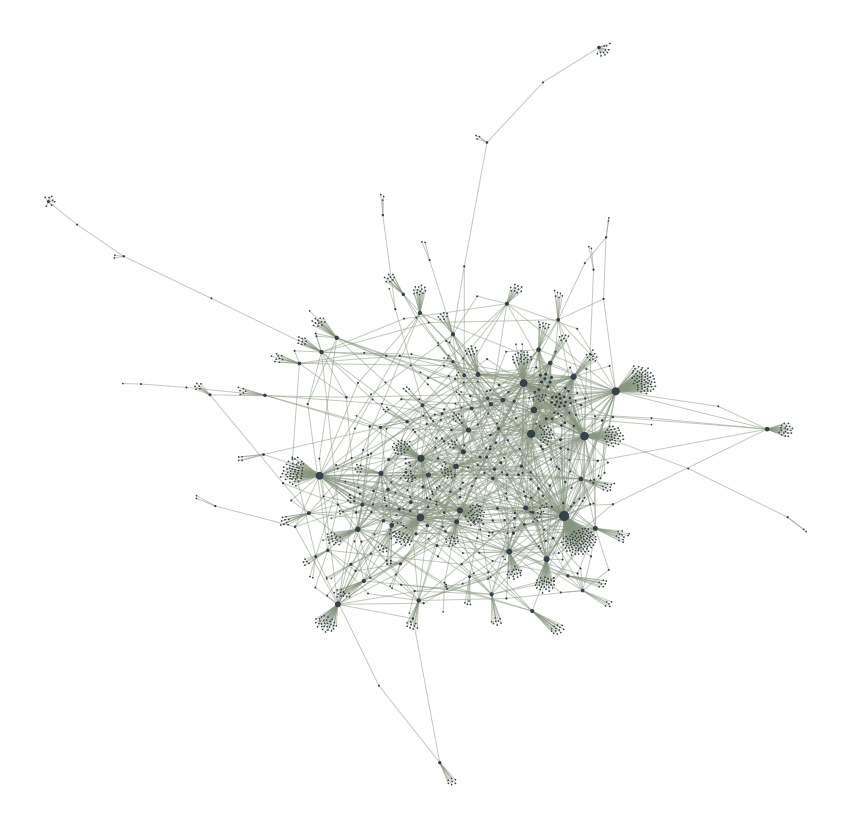

In [23]:
# Firstly, making an undirected version of the network so the plotting is better to work with
from fa2 import ForceAtlas2

little_sis_undirected = largest_ccls.to_undirected()
      
# Making a list of sizes for each node, based on the node's degree
d = dict(little_sis_undirected.degree)
sizes = [v/2 for v in d.values()]

# Declaring Force Atlas 2 parameters
forceatlas2 = ForceAtlas2(outboundAttractionDistribution = False,
                          edgeWeightInfluence = 0.5,
                          jitterTolerance = 0.2,
                          barnesHutOptimize = True,
                          barnesHutTheta = 0.6,
                          scalingRatio = 2.0,
                          strongGravityMode = True,
                          gravity = 1.0)

# Making the graph
positions = forceatlas2.forceatlas2_networkx_layout(little_sis_undirected, pos = None, iterations = 2000)
nx.draw_networkx_nodes(little_sis_undirected, positions, node_size = sizes, alpha = 0.9, node_color = '#2e3842')
nx.draw_networkx_edges(little_sis_undirected, positions, edge_color = "#87947f", alpha = 0.5)
plt.rcParams["figure.figsize"] = [30,30]
plt.axis('off')
plt.show()

## <font color = 'mediumBlue'> Run and comment on graph

<font color = 'mediumBlue'> Next, data will be extracted from **wikipedia**. A list of top 10 most powerful women for the past 15 years is extracted, which should include most of the women that have already been found on the little sis webiste. However in this case, much more text is available and many more relationship links related to the women's wiki text, all which will be used to further extend the little sis network. To begin with, a seperate wiki network will be created and then the networks will be combined.

In [ ]:
# ------------- COMMENT UM WIKI DATA -------------

# Fór yfir women og other töflurnar og skrifaði niður í word skjal nóður sem kannski væri hægt að sameina/eyða/sameina með því 
# að setja sameiginlegt attribute, eitthvað svoleiðis...

# Skoða það sem byrjar á "List_of_..." og pæla hvort það ætti að vera og sameina eitthvað eða taka út
# Skoða Master's_ og Master_ og Masters_... sameina eitthvað?
# Me_Too_movement|#MeToo og My_Own_Words|''My_Own_Words'' -> Passa að eyðist líka út eftir svona | 
# Ef orð eru tvisvar í röð, eyða seinna? T.d. Muammar_Gaddafi og Muammar_Gaddafi_Gaddafi -> ætti að sameinast

In [6]:
# Extracting wikipedia data, top 10 most powerful women for past years according to Forbes
# -*- coding: utf-8 -*-

def getwiki(list):
    # Let's make the string parameters for the url links
    baseurl = "https://en.wikipedia.org/w/api.php?"
    action = "action=query"
    content = "prop=revisions&rvprop=content"
    dataformat = "format=json"

    # Some calls don't work so we skip those and store here
    notWorking = [] 
    
    # Looping over all
    for i in range(len(list)): 
        # Percent encoding the name so it works also for names with special characters
        urlname = urllib.parse.quote(list[i])
        title = f'titles={urlname}'
        query = "{}{}&{}&{}&{}".format(baseurl, action, content, dataformat, title) # The whole url
        try: 
            wikiresponse = urllib.request.urlopen(query)
            wikidata = wikiresponse.read()
            wikitext = wikidata.decode('utf-8')
            pages_content = json.loads(wikitext)['query']['pages']
            key = next(iter(pages_content))
            try:
                data = pages_content[key]['revisions'][0]['*'] # This seems to be to make a nice format on the text
                words = len(re.findall(r'\w+', data))
                #if words < 15:
                #    print(data)
                loc = "C:/Users/erla/Google Drive/Skóli/DTU/02805 Social graphs and interactions/ProjectAssignment/fanndis.github.io/women_wiki/"
                dest = loc + urllib.parse.unquote(urlname) + '.txt'
                file2write = open(dest, 'w', encoding = 'utf-8')
                file2write.write(data)
                file2write.close()
            except: # KeyError or JSONDecodeError
                notWorking.append(urlname)
        except: # UnicodeEncodeError or JSONDecodeError
            notWorking.append(urlname)

    print(f'Didn\'t work for {len(notWorking)} list items')
    return notWorking

Didn't work for 5 list items
['Andrea_Marques_de_Almeida', 'Hajia_Amina_Mohammed_Az-Zubair', 'Jennifer_Nicholson_Salke', 'Paula_Santilli', 'Rania_Nashar']


In [ ]:
# Finding for which women on the list it didn't work to extract data from
notWorking = getwiki(women_list)
print(notWorking)

<font color = 'mediumBlue'> As can be seen above, it was not possible to find or extract the links for 5 women on the list. The reasons are:
* Jennifer Nicholson Salke - doesn't have a Wikipedia page.
* Andrea Marques de Almeida - doesn't have a Wikipedia page.
* Paula Santilli - doesn't have a Wikipedia page.
* Rania Nashar - doesn't have a Wikipedia page.
* Hajia Amina Mohammed Az-Zubair - her name is Amina J. Mohammed on Wikipedia, therefore the link is extracted manually below.extracted manually.

In [7]:
lastWoman = ['Amina_J._Mohammed'] #wikiname
notWorking2 = getwiki(lastWoman, "C:/Users/erla/Google Drive/Skóli/DTU/02805 Social graphs and interactions/ProjectAssignment/fanndis.github.io/women_wiki/")
print(notWorking2)

Didn't work for 0 list items
[]


<font color = 'mediumBlue'> Links for all the women have been extracted and now it is possible to create the wikipedia network based on that. First the women are counted and extracted, directed graph created and all nodes and links added. Again, like was done with the little sis graph, all spaces are replaced with underscore, dots are removed and all node names are made lowercase. 

In [8]:
path = "C:/Users/fanndis/Documents/MSc in Busniess Analytics/Social Graphs/fanndis.github.io/women_wiki/"
file_path = os.listdir(path)

link_list_wiki = []

for i in file_path:
    link_list_wiki.append(i[:-4])
    
print(f"There are {len(link_list_wiki)} women in the wiki list")

There are 153 women in the wiki list


# <font color = "red"> Búin að gera kóða til að ná í birth date í kóðasellunni hér að neðan (fyrsta block comment) og var byrjuð að skoða birth place og nationality. Pæling að implementa svo inni í for, á undan try, í kóðasellunni fyrir neðan (til að bæta attribute við nóðuna). Kannski hægt að bæta við birthplace og nationality sem tveimur attributeum, ef einhver er með annað en ekki hitt? Ekki allar með eitthvað. </font>

In [ ]:
def getyear(list, path):
    birthlist = []

    for i in range(len(link_list_wiki)):
        with io.open(path + link_list_wiki[i] + '.txt', 'r', encoding = 'utf-8') as fi:
            for ln in fi:
                year = None
                if 'birth_date' in ln:
                    year = re.search(r'\d\d\d\d', ln)
                    if year != None:
                        birthlist.append(int(year.group()))
                    break
            if year == None:
                birthlist.append(None)

    for i in range(len(birthlist)):
        if birthlist[i] != None:
            if birthlist[i] >= 2010:
                birthlist[i] = None
        else:
            birthlist[i] = 0
    
    return birthlist

In [27]:
def getplace(list, path):  
    birthplace = []

    for i in range(len(link_list_wiki)):
        with io.open(path + link_list_wiki[i] + '.txt', 'r', encoding = 'utf-8') as fi:
            place = 'notfound'
            for ln in fi:
                if 'birth_place' in ln:
                    place = ln.rsplit(', ', 1)[-1]
                    place = ''.join(e for e in place if e.isalnum())
                    if 'birthplace' in place:
                        place = place[10:]
                        if not place or re.search("^\s*$", place):
                            place = None
                            birthplace.append(place)
                        else:
                            birthplace.append(place)
                    else:
                        if not place or re.search("^\s*$", place):
                            place = None
                            birthplace.append(place)
                        else:
                            birthplace.append(place)
                    break
            if place == 'notfound':
                place = None
                birthplace.append(place)
                
    states_list = ['NewYork', 'NewYorkCity', 'Tennessee', 'Texas', 'Delaware', 'MarylandUSA', 'Indiana', 
                   'NewJerseyrefnamebritannica', 'UnitedStates']
    
    for i in range(len(birthplace)):
        if birthplace[i] != None:
            if 'UnitedStates' in birthplace[i] or birthplace[i] in states_list or birthplace[i].startswith('GAllen'):
                birthplace[i] = 'US'
            elif 'Russia' in birthplace[i] or 'SovietUnion' in birthplace[i]:
                birthplace[i] = 'Russia'
            elif 'Germany' in birthplace[i]:
                birthplace[i] = 'Germany'
            elif 'Australia' in birthplace[i]:
                birthplace[i] = 'Australia'
            elif 'Singapore' in birthplace[i]:
                birthplace[i] = 'Singapore'
            elif 'India' in birthplace[i]:
                birthplace[i] = 'India'
            elif 'England' in birthplace[i]:
                birthplace[i] = 'England'
            elif 'Bulgaria' in birthplace[i]:
                birthplace[i] = 'Bulgaria'
            elif 'Ethiopia' in birthplace[i]:
                birthplace[i] = 'Ethiopia'
            elif 'Pakistan' in birthplace[i]:
                birthplace[i] = 'Pakistan'
            elif 'Indonesia' in birthplace[i]:
                birthplace[i] = 'Indonesia'
            elif 'Slovakia' in birthplace[i]:
                birthplace[i] = 'Slovakia'
            elif 'Yugoslavia' in birthplace[i]:
                birthplace[i] = 'Serbia'     
        else:
            birthplace[i] = 'x'
                
    return birthplace

'\n##### NATIONALITY #####                \n\nfor i in range(len(link_list_wiki)):\n    with io.open(path + link_list_wiki[i] + \'.txt\', \'r\', encoding = \'utf-8\') as fi:\n        for ln in fi:\n            place = None\n            if ln.startswith("| nationality") or ln.startswith("|nationality"):\n                #place = ln.rsplit(None, 1)[-1]\n                #print(link_list_wiki[i],":", place)\n                print(i, " ", ln)\n'

# <font color = "red"> Smá breyting í kóðasellunni hér að neðan, á eftir bara svo að bæta inn auka attributeum. </font>

In [9]:
path = "C:/Users/erla/Google Drive/Skóli/DTU/02805 Social graphs and interactions/ProjectAssignment/fanndis.github.io/women_wiki/"
birthyear = getyear(link_list_wiki, path) 
birthplace = getplace(link_list_wiki, path) 

#print(len(link_list_wiki))
#print(len(birthyear))
#print(len(birthplace))

tupleList = []
for i in range(len(link_list_wiki)):
    tupleList.append((link_list_wiki[i], birthyear[i], birthplace[i]))

wiki_graph = nx.DiGraph()

# Adding nodes and links
for i in range(len(link_list_wiki)):
    page = io.open(path + link_list_wiki[i] + '.txt', 'r', encoding = 'utf-8').read()             # Fetching page contents
    node1 = link_list_wiki[i].replace(' ','_').replace('.','').lower()
    current_node_list = list(wiki_graph.nodes())
    if node1 not in current_node_list:
        wiki_graph.add_node(node1, category = "Woman", birthyear = tupleList[i][1], birthplace = tupleList[i][2])
    try:
        links = re.findall(r'\[\[(.*?)\]\]', page)                                    # Find all links in page
        links = [n for n in links if "File:" not in n]                                # Erasing links with "Category:"
        links = [n for n in links if "Category:" not in n]
        links = [re.sub(r"\|.*","", l) for l in links]                               # Erase | and text behind
        links = [re.sub(r"\#.*","", l) for l in links]                               # Erase # and text behind
        links = [l.replace(' ','_').replace('.','').lower() for l in links]                                  # Replacing spaces                                       # Making all lowercase
        current_node_list = list(wiki_graph.nodes())
        for link in links:                                                            # Don't want to add already added nodes
            if link not in current_node_list:
                if link in [l.replace(' ','_').replace('.','').lower() for l in link_list_wiki]:
                    wiki_graph.add_node(link, category = "Woman", birthyear = tupleList[i][1], birthplace = tupleList[i][2])
                else:
                    #if link == 'hillary_clinton':
                    wiki_graph.add_node(link)
        #W.add_nodes_from(links)                                                       # Adding nodes
        wiki_graph.add_edges_from([(node1, node2) for node2 in links])
    except:
        print(f'Didn\'t work for {node1}')

<font color = 'mediumBlue'> Extracting and showing information about the wiki graph below, node count, edge count and then same information for the largest component of the graph.

In [10]:
print(f'Number of nodes in whole network: {wiki_graph.number_of_nodes()}')
print(f'Number of edges in whole network: {wiki_graph.number_of_edges()}')

largest_ccw = wiki_graph.subgraph(max(nx.weakly_connected_components(wiki_graph), key = len))

print(f'Number of nodes in largest cc: {largest_ccw.number_of_nodes()}')
print(f'Number of edges in largest cc: {largest_ccw.number_of_edges()}')

Number of nodes in whole network: 12728
Number of edges in whole network: 16317
Number of nodes in largest cc: 12708
Number of edges in largest cc: 16305


<font color = 'mediumBlue'> Visualizing the degree distribution in the wiki graph

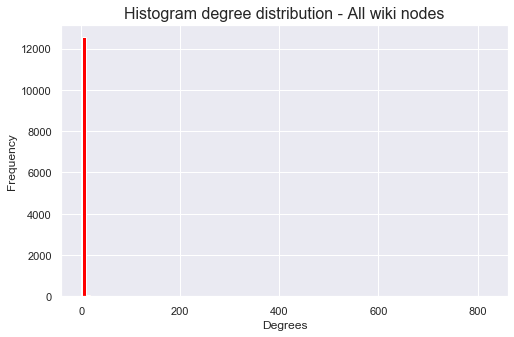

In [11]:
degrees = [largest_ccw.degree(n) for n in largest_ccw.nodes()]

# Constructing a figure of histogram degree distributions
plt.figure(figsize = (8,5))
plt.hist(degrees, bins = 100, color = 'red')
plt.title('Histogram degree distribution - All wiki nodes', fontsize = 16)
plt.xlabel('Degrees')
plt.ylabel('Frequency')
plt.show();

## <font color = 'mediumBlue'>  Comment on graph

<font color = 'mediumBlue'> Visualizing degree distribution for nodes with higher degree than 5 in order to see more relevant distribution since most of the nodes have very few connections.

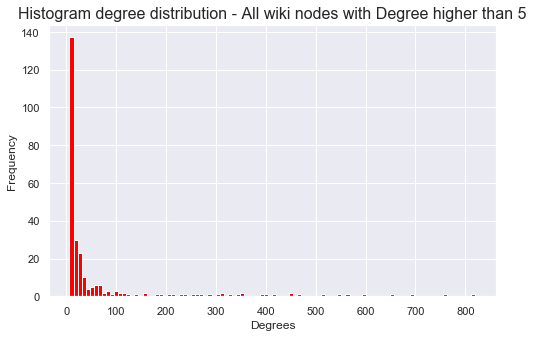

In [24]:
degrees = [largest_ccw.degree(n) for n in largest_ccw.nodes()]
sample_degrees = []
for i in degrees:
    if i > 5:
        sample_degrees.append(i)

# Constructing a figure of histogram degree distributions
plt.figure(figsize = (8,5))
plt.hist(sample_degrees, bins = 100, color = 'red')
plt.title('Histogram degree distribution - All wiki nodes with Degree higher than 5', fontsize = 16)
plt.xlabel('Degrees')
plt.ylabel('Frequency')
plt.show();

## <font color = 'mediumBlue'>  Comment on graph
    
<font color = 'mediumBlue'> Visualizing the wiki graph with Force Atlas below

100%|██████████| 2000/2000 [54:47<00:00,  1.64s/it] 


BarnesHut Approximation  took  265.98  seconds
Repulsion forces  took  2970.37  seconds
Gravitational forces  took  0.37  seconds
Attraction forces  took  3.77  seconds
AdjustSpeedAndApplyForces step  took  23.03  seconds


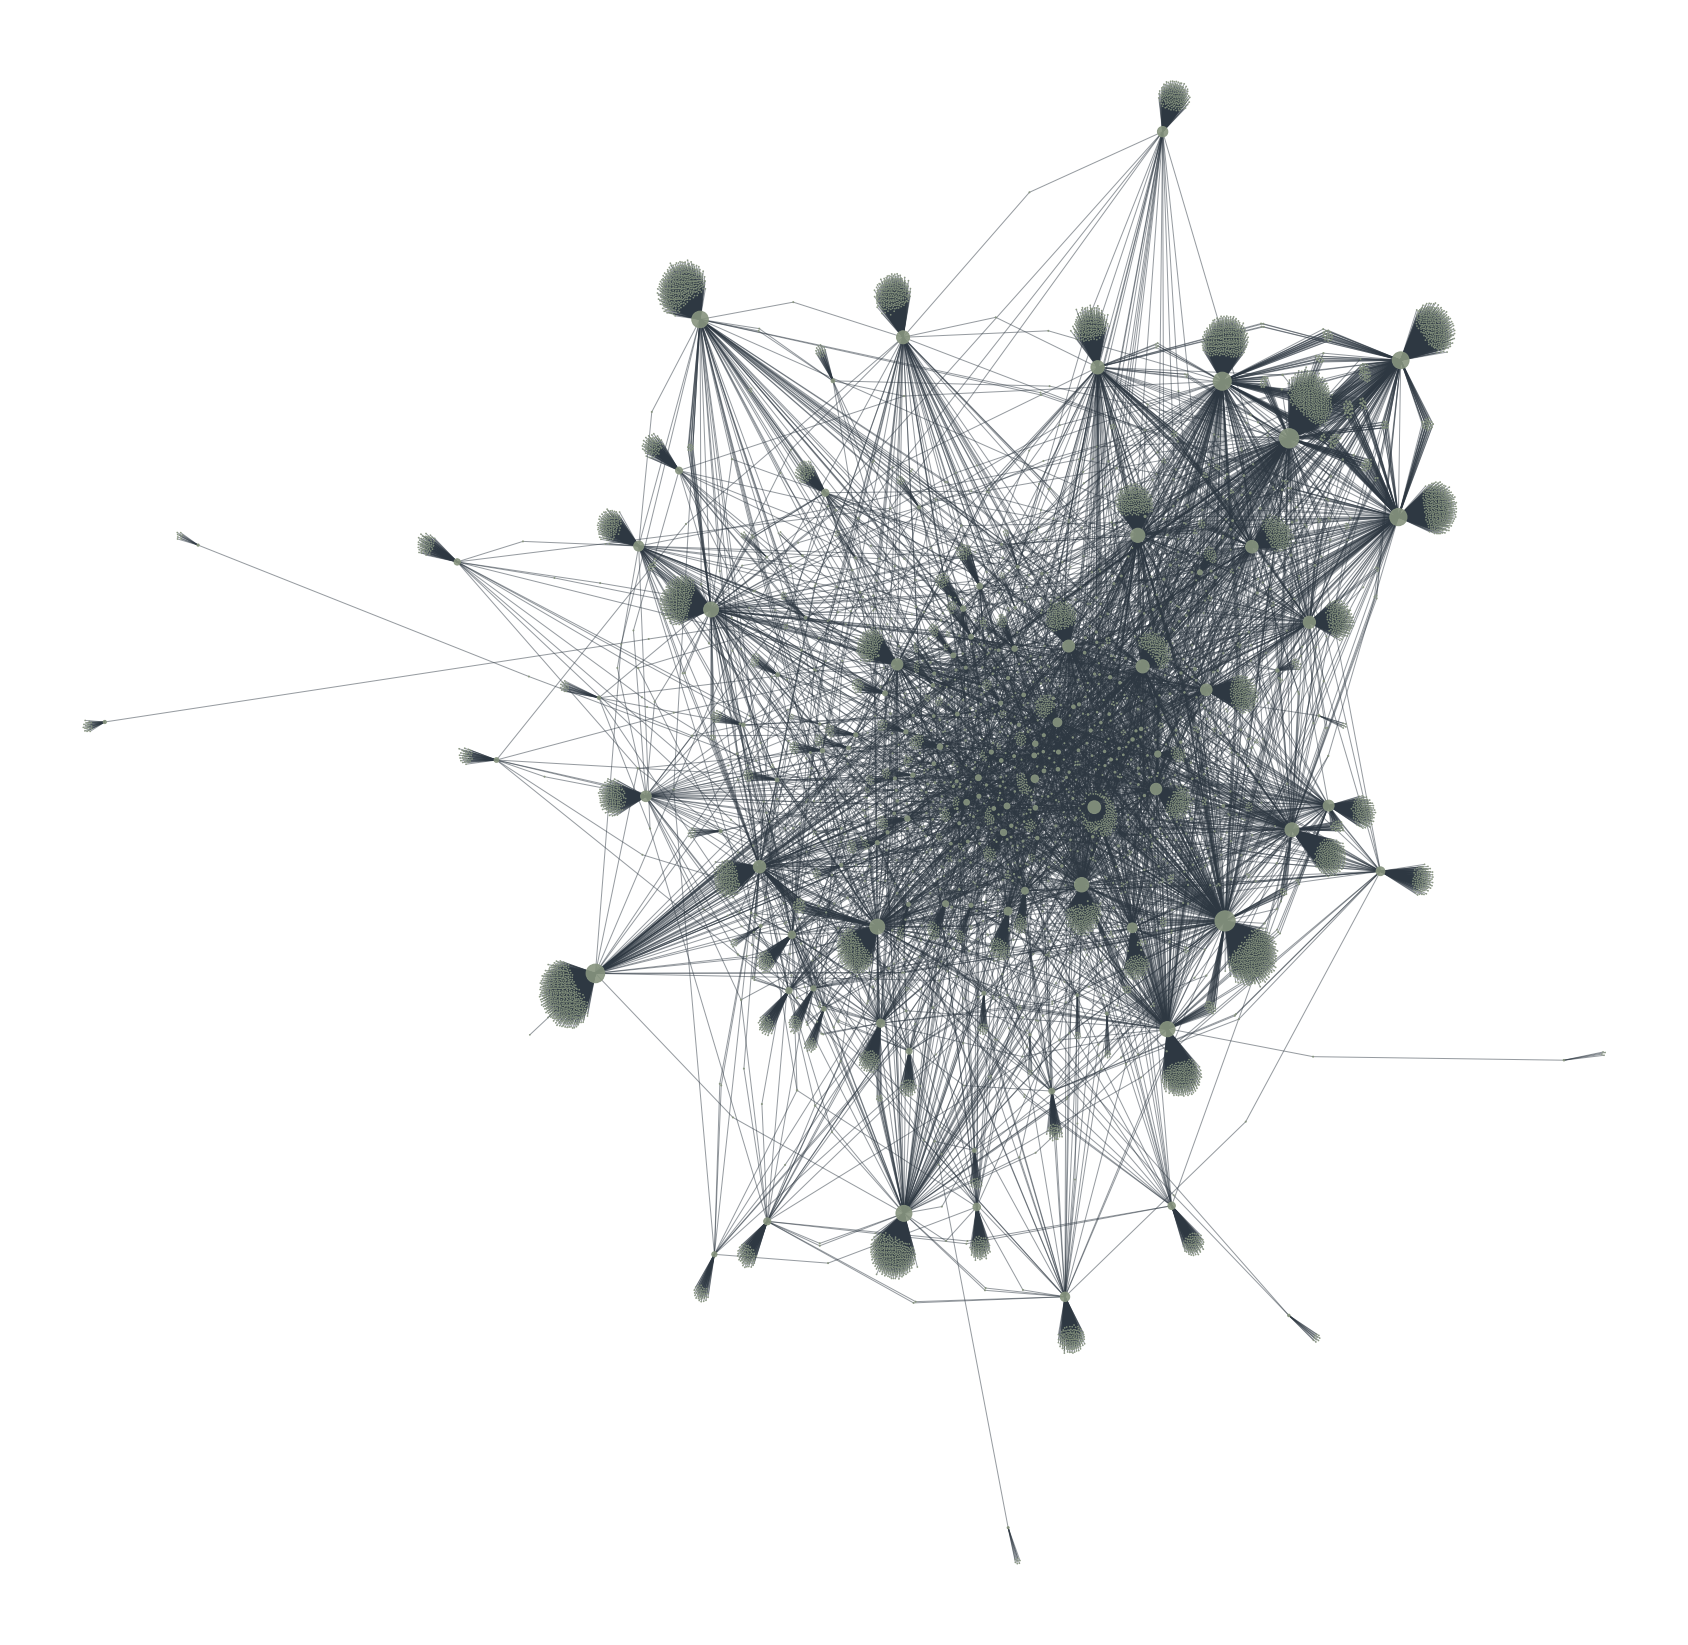

In [26]:
# Firstly, making an undirected version of the network so the plotting is better to work with
from fa2 import ForceAtlas2
wiki_undirected = largest_ccw.to_undirected()

# Assigning different colors to nodes based on their universe

        
# Making a list of sizes for each node, based on the node's degree
d = dict(wiki_undirected.degree)
sizes = [v/2 for v in d.values()]

# Declaring Force Atlas 2 parameters
forceatlas2 = ForceAtlas2(outboundAttractionDistribution = False,
                          edgeWeightInfluence = 0.5,
                          jitterTolerance = 0.2,
                          barnesHutOptimize = True,
                          barnesHutTheta = 0.6,
                          scalingRatio = 2.0,
                          strongGravityMode = True,
                          gravity = 1.0)

# Making the graph
positions = forceatlas2.forceatlas2_networkx_layout(wiki_undirected, pos = None, iterations = 2000)
nx.draw_networkx_nodes(wiki_undirected, positions, node_size = sizes, alpha = 0.9, node_color = "#87947f")
nx.draw_networkx_edges(wiki_undirected, positions, edge_color = "#2e3842", alpha = 0.5)
plt.rcParams["figure.figsize"] = [30,30]
plt.axis('off')
plt.show()

## <font color = 'mediumBlue'> COMMENT ON GRAPH

<font color = 'mediumBlue'> Now the two graphs, little sis and wiki, will be combined before further analysis will be done. Only one set of edges will be in the combined graph if there are duplications.

In [ ]:
path = 'C:/Users/erla/Google Drive/Skóli/DTU/02805 Social graphs and interactions/ProjectAssignment/fanndis.github.io/worlds_most_powerful_women/'
file_path = os.listdir(path)

print(little_sis_graph.number_of_nodes())
print(little_sis_graph.number_of_edges())

toDelete = []

# Looping through all little sis files, adding nodes and links into the graph
for i in file_path:
    p = path + i
    try:
        data = pd.read_csv(p)
        isAnything = data['id'][0]
    except:
        toDelete.append(i.replace(' ','_').replace('.','').lower()[:-3])
        
print(len(toDelete))

little_sis_graph.remove_nodes_from(toDelete)
        
print(little_sis_graph.number_of_nodes())
print(little_sis_graph.number_of_edges())

In [ ]:
combined_graph = nx.compose(little_sis_graph, wiki_graph)

print('Number of nodes in combined graph: ', combined_graph.number_of_nodes())
print('Number of edges in combined graph: ', combined_graph.number_of_edges())

largest_cc = combined_graph.subgraph(max(nx.weakly_connected_components(combined_graph), key = len))

print(f'Number of nodes in largest cc: {largest_cc.number_of_nodes()}')
print(f'Number of edges in largest cc: {largest_cc.number_of_edges()}')

## ATH DON'T RUN THE SELL BELOW AGAIN

In [ ]:
#creating txt files for all nodes, not only top women for further analysis
flat_list = [item for sublist in all_data_links for item in sublist]
unique_raw_list = list(set(flat_list))
all_nodes = list(combined_graph.nodes())
all_node_files = getwiki(unique_raw_list, 'C:/Users/fanndis/Documents/MSc in Busniess Analytics/Social Graphs/fanndis.github.io/all_wiki/')

## **3. Tools, theory and analysis. Describe the process of theory to insight**

   * **Talk about how you've worked with text, including regular expressions, unicode, etc.**
   
   <font color = 'mediumBlue'> ANSWER
    

   * **Describe which network science tools and data analysis strategies you've used, how those network science measures work, and why the tools you've chosen are right for the problem you're solving.**
   
   <font color = 'mediumBlue'> ANSWER
    

   * **How did you use the tools to understand your dataset?**
     
     <font color = 'mediumBlue'> ANSWER

<font color = 'mediumBlue'> The tools and analysis strategies described above will be done in the following cells. to start with, connections between only the powerful women will be analysed. 
    
**Which powerful women have a connection to another powerful women?**

In [14]:
#looping through all the nodes and only showing the links between the different women
counter = 0

for (node1, node2) in combined_graph.edges():
    if combined_graph.nodes(data = 'category')[node1] == "Woman" and combined_graph.nodes(data = 'category')[node2] == "Woman":
        if combined_graph[node1] != combined_graph[node2]:
            print(node1, "+", node2)
            counter +=1

print()
print('The number of internal women connections are: ', counter)

abigail_johnson + hillary_clinton
hillary_clinton + condoleezza_rice
hillary_clinton + laura_bush
aileen_lee + hillary_clinton
ana_botín + ana_botin
ana_botín + kristalina_georgieva
ana_botin + ana_botín
angela_braly + carly_fiorina
carly_fiorina + hillary_clinton
carly_fiorina + meg_whitman
angela_merkel + ursula_von_der_leyen
angela_merkel + hillary_clinton
angela_merkel + michelle_obama
angela_merkel + mette_frederiksen
anne_finucane + hillary_clinton
anne_finucane + sheila_bair
sheila_bair + angela_merkel
anne_lauvergeon + angela_merkel
anne_lauvergeon + patricia_russo
anne_m._mulcahy + hillary_clinton
anne_wojcicki + hillary_clinton
anne_wojcicki + susan_wojcicki
ava_duvernay + oprah_winfrey
ava_duvernay + beyoncé
beyoncé + taylor_swift
beyoncé + michelle_obama
beyoncé + lady_gaga
beyoncé + serena_williams
beyoncé + ava_duvernay
beyoncé + oprah_winfrey
beyoncé + hillary_clinton
beyoncé + rihanna
brenda_c._barnes + hillary_clinton
christine_lagarde + kristalina_georgieva
condoleezz

## ATH NAMING OF THE WOMEN - DUPLICATIONS. MAYBE NOT SHOW THIS LIST ABOVE
<font color = 'mediumBlue'> As can be seen above, ?? women have connections to other women. Since the network is directed, some connections are shown twice, if both women have a link to each other. 

 <font color = 'mediumBlue'> **Next, finding the top 10 most connected women, top 10 connected non-women for all three graphs (little sis, wikipedia and the combined graph).**

In [38]:
dfw = pd.DataFrame([node, largest_ccw.degree(node), largest_ccw.nodes(data = 'category')[node]] for node in largest_ccw.nodes())
dfw.columns = ['Node', 'Degree', 'Category']
dfw_women = dfw[dfw['Category'] == 'Woman']
dfw_other = dfw[dfw['Category'] != 'Woman']

dfls = pd.DataFrame([node, largest_ccls.degree(node), largest_ccls.nodes(data = 'category')[node]] for node in largest_ccls.nodes())
dfls.columns = ['Node', 'Degree', 'Category']
dfls_women = dfls[dfls['Category'] == 'Woman']
dfls_other = dfls[dfls['Category'] != 'Woman']

dfall = pd.DataFrame([node, largest_cc.degree(node), largest_cc.nodes(data = 'category')[node]] for node in largest_cc.nodes())
dfall.columns = ['Node', 'Degree', 'Category']
dfall_women = dfall[dfall['Category'] == 'Woman']
dfall_other = dfall[dfall['Category'] != 'Woman']

print('Top 10 most connected women LITTLE SIS:')
print(dfls_women.sort_values(by = 'Degree', ascending = False).head(10))
print()
print('Top 10 most connected women WIKIPEDIA:')
print(dfw_women.sort_values(by = 'Degree', ascending = False).head(10))
print()
print()
print('Top 10 most connected non-women LITTLE SIS:')
print(dfls_other.sort_values(by = 'Degree', ascending = False).head(10))
print()
print('Top 10 most connected non-women WIKIPEDIA:')
print(dfw_other.sort_values(by = 'Degree', ascending = False).head(10))
print()
print()
print('Top 10 most connected women Combined Graph:')
print(dfall_women.sort_values(by = 'Degree', ascending = False).head(10))
print()
print('Top 10 most connected women Combined Graph:')
print(dfall_other.sort_values(by = 'Degree', ascending = False).head(10))

Top 10 most connected women LITTLE SIS:
                     Node  Degree Category
745   laurene_powell_jobs     163    Woman
672      kathleen_kennedy     110    Woman
1236      sheryl_sandberg     101    Woman
30        hillary_clinton      99    Woman
937           meg_whitman      93    Woman
159         anne_finucane      90    Woman
1134           safra_catz      87    Woman
0         abigail_johnson      77    Woman
262         anne_wojcicki      60    Woman
1264       susan_wojcicki      55    Woman

Top 10 most connected women WIKIPEDIA:
                   Node  Degree Category
564     hillary_clinton     820    Woman
1113            beyoncé     756    Woman
1494    serena_williams     694    Woman
1410       taylor_swift     653    Woman
1428          lady_gaga     598    Woman
1739            rihanna     567    Woman
3094       elizabeth_ii     547    Woman
12219  yulia_tymoshenko     511    Woman
7795       nancy_pelosi     463    Woman
286       angela_merkel     452    Wo

<font color = 'mediumBlue'> **Visualizing with a network only between the women:** 

In [ ]:
PW = combined_graph.subgraph(node for node in combined_graph.nodes() if combined_graph.nodes(data = 'category')[node] == "Woman")

In [ ]:
for node in PW.nodes():
    if PW.nodes(data='birthyear')[node] == None:
        nx.set_node_attributes(PW, {node:0}, 'birthyear')
    if PW.nodes(data='birthplace')[node] == None:
        nx.set_node_attributes(PW, {node:'x'}, 'birthplace')
    
PW_unfrozen_graph = nx.Graph(PW)
    
print(PW_unfrozen_graph.number_of_nodes())
print(PW_unfrozen_graph.number_of_edges())
    
for (node1, node2) in PW_unfrozen_graph.edges():
    if PW_unfrozen_graph[node1] == PW_unfrozen_graph[node2]:
        PW_unfrozen_graph.remove_edge(node1, node2)
        
print(PW_unfrozen_graph.number_of_nodes())
print(PW_unfrozen_graph.number_of_edges())

nx.write_gexf(PW_unfrozen_graph, "PowerfulWomen_v2.gexf")

<font color = 'mediumBlue'> To further analyse the top 10 women, the word similarity between their pages is looked into. A tf-idf ratio is found for each word of the top 10 women wiki pages and then a cosine similarity is used to find the similarities between the pages. 
The tf-idf ratio is found by calculating the term frequency where the **raw count** will be used, which is the number of times that term t occurs in document d. Then, to calculate the inverse document frequency, **the logarithmically scaled inverse fraction of the documents that contain the word** is used. The total number of documents, N, is divided by the number of documents where the term t appears, and then finally the logarithm of this division returns the IDF.
    
$$tf(t,d) = f_{t,d} \qquad \textrm{and} \qquad idf(t,D) = log \frac{\textrm{N}}{ \textrm{n}_t}. $$
    
Finally, to find the TF-IDF, the tf and idf ratio's are multiplied:
$$tfidf(t,d,D) = tf_{t,d} * idf(t,D) $$ 
    
To calculate the similarity, a cosine simlarity is used with the following formula:
$$cosine\_similarity(A,B) = \frac{A*B}{||A|| x ||B||} $$ 
    
All relevant functions based on formulas above are defined in the cell below and then the similarities and community detection done.

In [73]:
#word similarity functions

import nltk, re, pprint
from nltk import word_tokenize,FreqDist
import os
import string
from collections import Counter
import math
from matplotlib import cm
import community


def file_combine_clean(location,data_list):
    
    all_files_path = location
    
    file_list = []
    tf_lists = []
    word_lists = []

    for i in data_list:
        p = all_files_path + i + '.txt'
        path = nltk.data.find(p)
        raw = open(path, 'r',encoding="utf-8").read()
        filtered_out = re.sub(r'\{{.*?\}}', '',raw)
        filtered_out = re.sub('style=".*?\"', ' ',filtered_out)  #removing all related to the css of files
        filtered_out = re.sub('bgcolor=.*?\"', ' ',filtered_out)
        filtered_out = re.sub('bgcolor=.*?\|', ' ',filtered_out)
        filtered_out = re.sub("#.*?\|",' ',filtered_out)
        filtered_out = re.sub("#.*?\}",' ',filtered_out)
        words = word_tokenize(filtered_out)
        filtered_sentence = [w.lower() for w in words]
        filtered_string = ' '.join(filtered_sentence)
        exclude = set(string.punctuation)
        filtered_string = ''.join(ch for ch in filtered_string if ch not in exclude)
        filtered_string = re.sub(' +', ' ',filtered_string)
        filtered_string = filtered_string.strip()
        file_list = list(filtered_string.split(" ")) 
        fdist_women = FreqDist([w for w in file_list if len(w) > 1])
        tf_lists.append(fdist_women)
        word_lists.append(file_list)
    
    return word_lists,tf_lists,fdist_women,file_list
        

def tf_idf(word_lists,items):
   #flattening out and finding all unique words in all communities
    all_words = [item for sublist in word_lists for item in sublist]
    all_unique_words = set(all_words) 
    
    unique_word_lists = []

    #removing duplicates of words within each community so we won't count
    #each word in a community more than once
    
    for i in word_lists:
        unique_word_lists.append(set(i))

    #flattening out so we don't have list of lists - instead only one list
    flat_word_list = [item for sublist in unique_word_lists for item in sublist]

    #calculating in how many communities each word is
    document_count = FreqDist([w for w in flat_word_list])

    IDF_dict = {}

    #calculating IDF and storing in dictionary
    for i in document_count:
        IDF_dict[i] = math.log(items/document_count[i])

    TF_IDF_dict = {}
    TF_IDF_list = []

    for i in tf_lists:
        TF_IDF_dict_com = {}
        for j in i:
            TF_IDF_dict_com[j] = i[j] * IDF_dict[j]
        TF_IDF_list.append(TF_IDF_dict_com)
    return TF_IDF_list


# For finding the similarity between two nodes
def cosine_similarity(name1,name2, tfidf):    
    common_words = set(tfidf[name1]) | set(tfidf[name2])   
    sumxx, sumxy, sumyy = 0, 0, 0
    for w in common_words:
        x = tfidf[name1].get(w,0)
        y = tfidf[name2].get(w,0)
        sumxx += x*x
        sumyy += y*y
        sumxy += x*y
    return sumxy/((math.sqrt(sumxx) * math.sqrt(sumyy)))

## <font color = 'mediumBlue'> Top 10 Women - word similarity
<font color = 'mediumBlue'> Using the functions above to find the similarities and then visualizing with similaritiy matrix plot.

In [74]:
top10_women = list(dfall_women.sort_values(by = 'Degree', ascending = False)['Node'].head(10))
top10_women_files = []
for i in women_list:
    for j in top10_women:
        if i.lower() == j:
            top10_women_files.append(i)           

In [75]:
word_lists,tf_lists,fdist_women,file_list = file_combine_clean('C:/Users/fanndis/Documents/MSc in Busniess Analytics/Social Graphs/fanndis.github.io/women_wiki/',top10_women_files)
tf_idf_top10 = tf_idf(word_lists,len(top10_women_files))
M = len(top10_women_files)
sim_matrix = np.zeros([M, M])
for i, ni in enumerate(top10_women_files):
    for j, ji in enumerate(top10_women_files):
        sim_matrix[i,j] = round(math.sqrt(cosine_similarity(i, j, tf_idf_top10)),2)

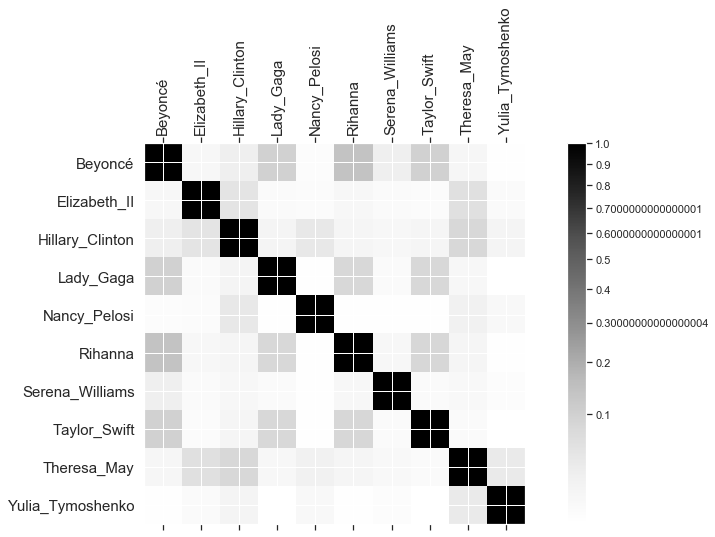

In [76]:
f, ax = plt.subplots(figsize=(15, 7))

cax = ax.matshow(sim_matrix, cmap=cm.get_cmap('Greys'))
plt.xticks(range(M), top10_women_files, rotation=90, fontsize = 15)
plt.yticks(range(M), top10_women_files, fontsize = 15)
cb = plt.colorbar(cax)
ticks = np.linspace(0,1,11)
cb.set_ticks([math.sqrt(n) for n in ticks])
cb.set_ticklabels(ticks)
plt.show()

## <font color = 'mediumBlue'> COMMENT ON GRAPH

## <font color = 'mediumBlue'> Communities
<font color = 'mediumBlue'> Communities for all the nodes in the combined network are found. The algorithm used is **The Louvain Method for Community Detection** which extracts communities from large networks. The algorithm is a greedy optimization method were the modularity is being optimized but the modularity measures the density of links inside communities compared to links between communities. The algorithm starts by finding small communities by optimizing the modularity locally on all nodes, then all small communities are grouped into one node and the steps are repeated. [Source](https://en.wikipedia.org/wiki/Louvain_method)

By using the Python Louvain-algorithm we can find communities in our undirected combined network.   

In [77]:
#using library community to find communities

undirected =  combined_graph.to_undirected() #making the graph undirected
partition = community.best_partition(undirected) #using community function

print('Number of Communities Found: ',len(set(partition.values()))) 
print('The Modularity of the Communities: ',community.modularity(partition,undirected))

Number of Communities Found:  43
The Modularity of the Communities:  0.7590694294508269


<font color = 'mediumBlue'> Visualizing the distribution of the communities

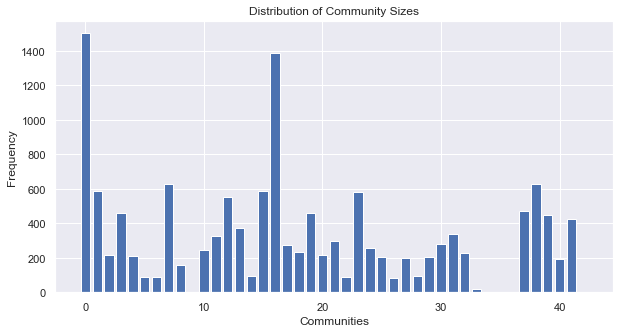

In [78]:
data = list(partition.values())
max_partition = max(partition.values())
min_partition = min(partition.values())

v = list(range(min_partition, max_partition+2))
hist = np.histogram(data, bins = v)

plt.figure(figsize = (10,5));
plt.bar(list(hist[1][:-1]),list(hist[0]));
plt.title('Distribution of Community Sizes');
plt.xlabel('Communities');
plt.ylabel('Frequency');

## <font color = 'mediumBlue'> COMMENT ON GRAPH
    
<font color = 'mediumBlue'>

In [115]:
top6_com = sorted(range(len(hist[0])), key=lambda i: hist[0][i])[-6:]
all_com = sorted(range(len(hist[0])), key=lambda i: hist[0][i])

community_list = []

#finding all nodes in all top 6 communities and adding to lists
for com in set(partition.values()):
    if com in top6_com:
        list_nodes = [nodes for nodes in partition.keys()
                                    if partition[nodes] == com]
        community_list.append(list_nodes)       

In [80]:
#ATH take out path
infile_path = 'C:/Users/fanndis/Documents/MSc in Busniess Analytics/Social Graphs/fanndis.github.io/all_wiki/'

file_path = os.listdir(infile_path)

#combining all txt files in each community into one core document for all communities
counter = 1
for i in community_list:
    text_files_with_path = []
    for j in i:
        for f in file_path:
            if f[:-4].lower() == j:
                text_files_with_path.append(infile_path + f)
    #ATH take out path            
    outfilename = 'C:/Users/fanndis/Documents/MSc in Busniess Analytics/Social Graphs/fanndis.github.io/communities/community_'
    outfilename = outfilename + str(counter) + '.txt'
    try:
        with open(outfilename, 'w',encoding="UTF-8") as f:
            for file in text_files_with_path:
                with open(file,'r',encoding="UTF-8") as infile:
                    f.write(infile.read()+'\n')    
    except:
        print('Did not work for file: ', outfilename)
    counter = counter + 1

In [81]:
#ATH take out the path
all_files_path = 'C:/Users/fanndis/Documents/MSc in Busniess Analytics/Social Graphs/fanndis.github.io/communities/community_'

N = 6

community_list = []
tf_lists = []
word_lists = []

for i in range(1,N+1):
    p = all_files_path + str(i) + '.txt'
    path = nltk.data.find(p)
    raw = open(path, 'r',encoding="utf-8").read()
    filtered_out = re.sub(r'\{{.*?\}}', '',raw)
    filtered_out = re.sub('style=".*?\"', ' ',filtered_out)  #removing all related to the css of files
    filtered_out = re.sub('bgcolor=.*?\"', ' ',filtered_out) #removing all related to the css of files
    filtered_out = re.sub('bgcolor=.*?\|', ' ',filtered_out) #removing all related to the css of files
    filtered_out = re.sub("#.*?\|",' ',filtered_out) #removing all related to the css of files
    filtered_out = re.sub("#.*?\}",' ',filtered_out) #removing all related to the css of files
    words = word_tokenize(filtered_out)
    filtered_sentence = [w.lower() for w in words]
    filtered_string = ' '.join(filtered_sentence)
    exclude = set(string.punctuation)
    filtered_string = ''.join(ch for ch in filtered_string if ch not in exclude)
    filtered_string = re.sub(' +', ' ',filtered_string)
    filtered_string = filtered_string.strip()
    community_list = list(filtered_string.split(" ")) 
    fdist_community = FreqDist([w for w in community_list if len(w) > 1])
    tf_lists.append(fdist_community)
    word_lists.append(community_list)

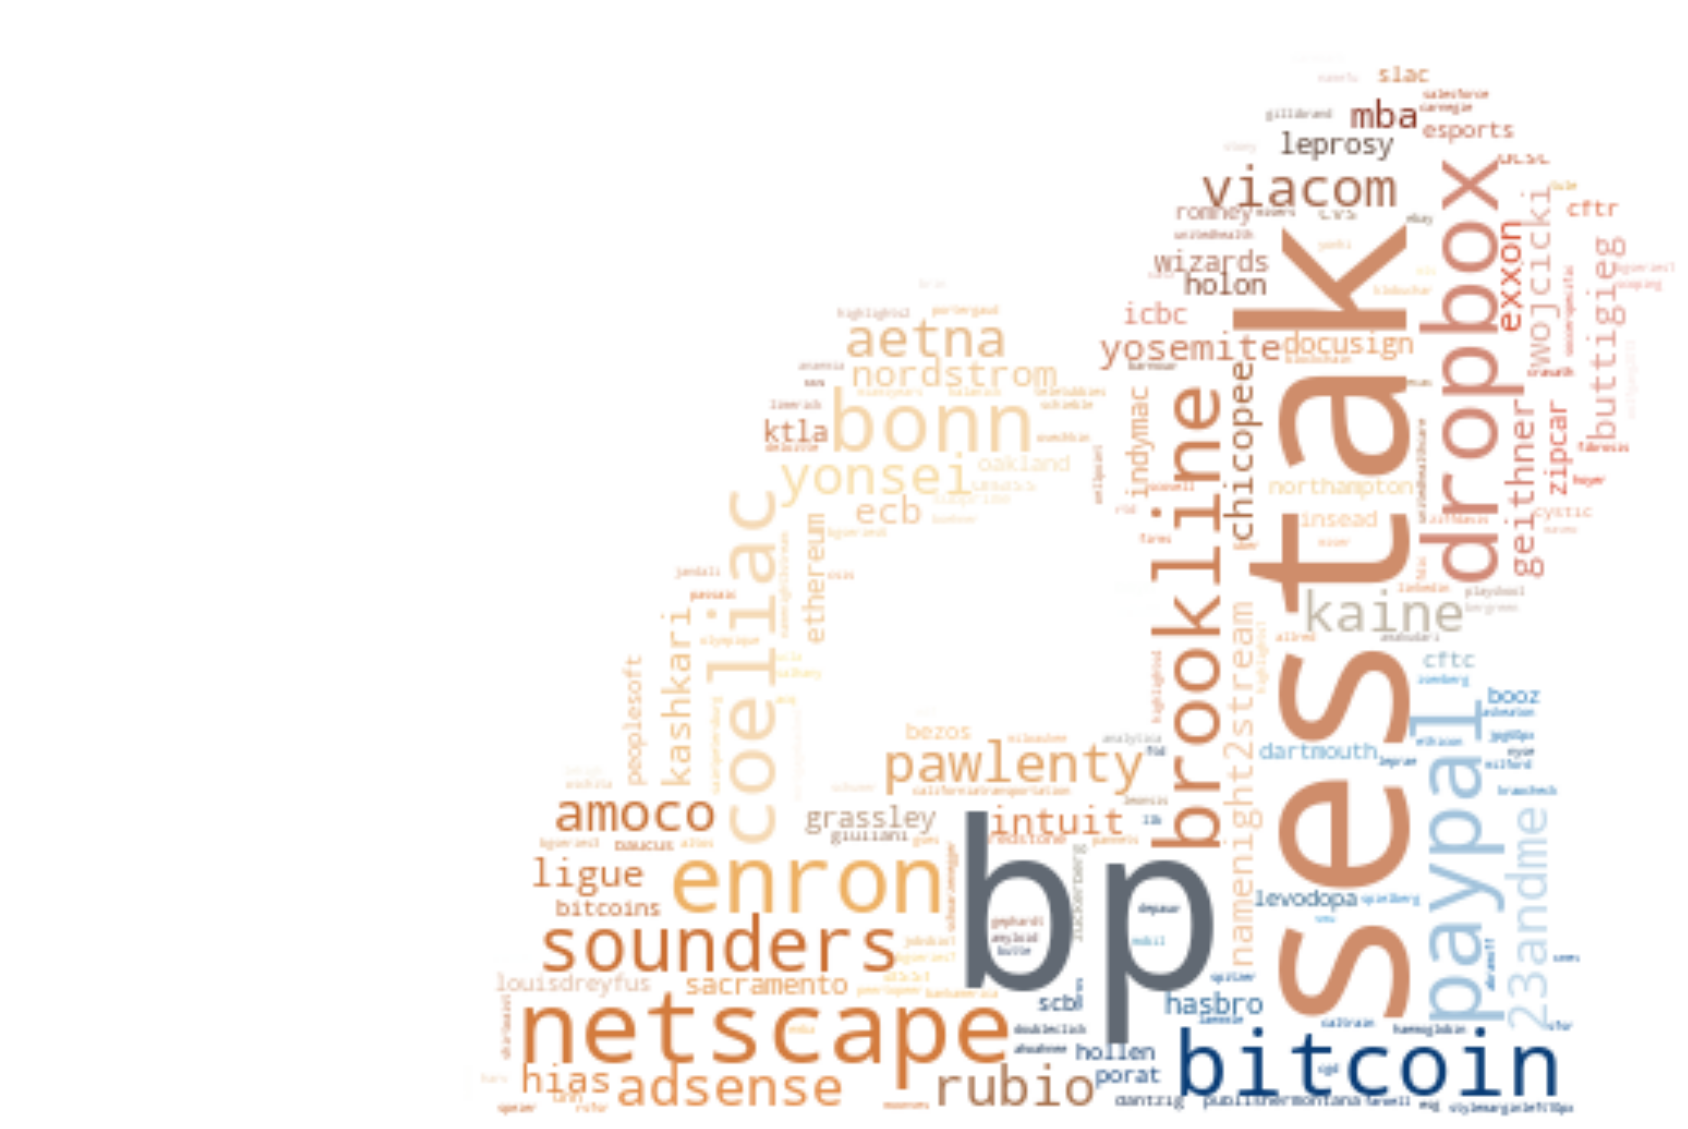

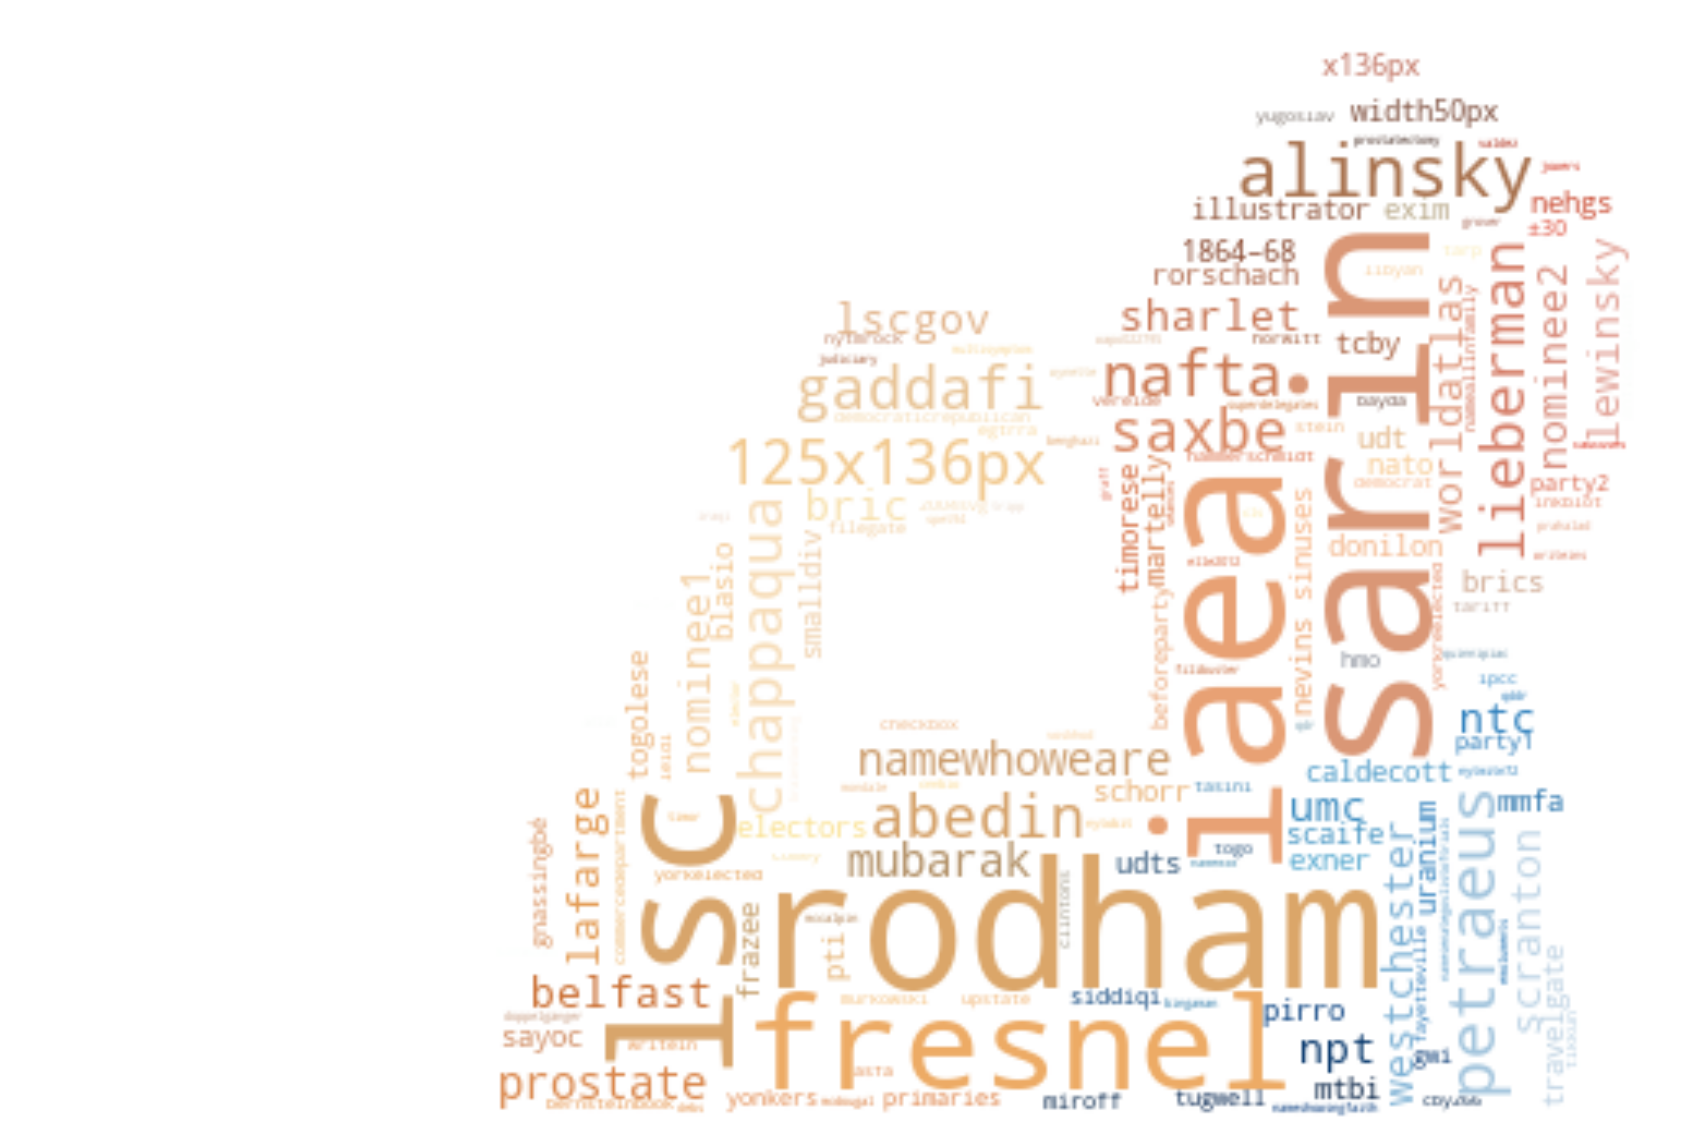

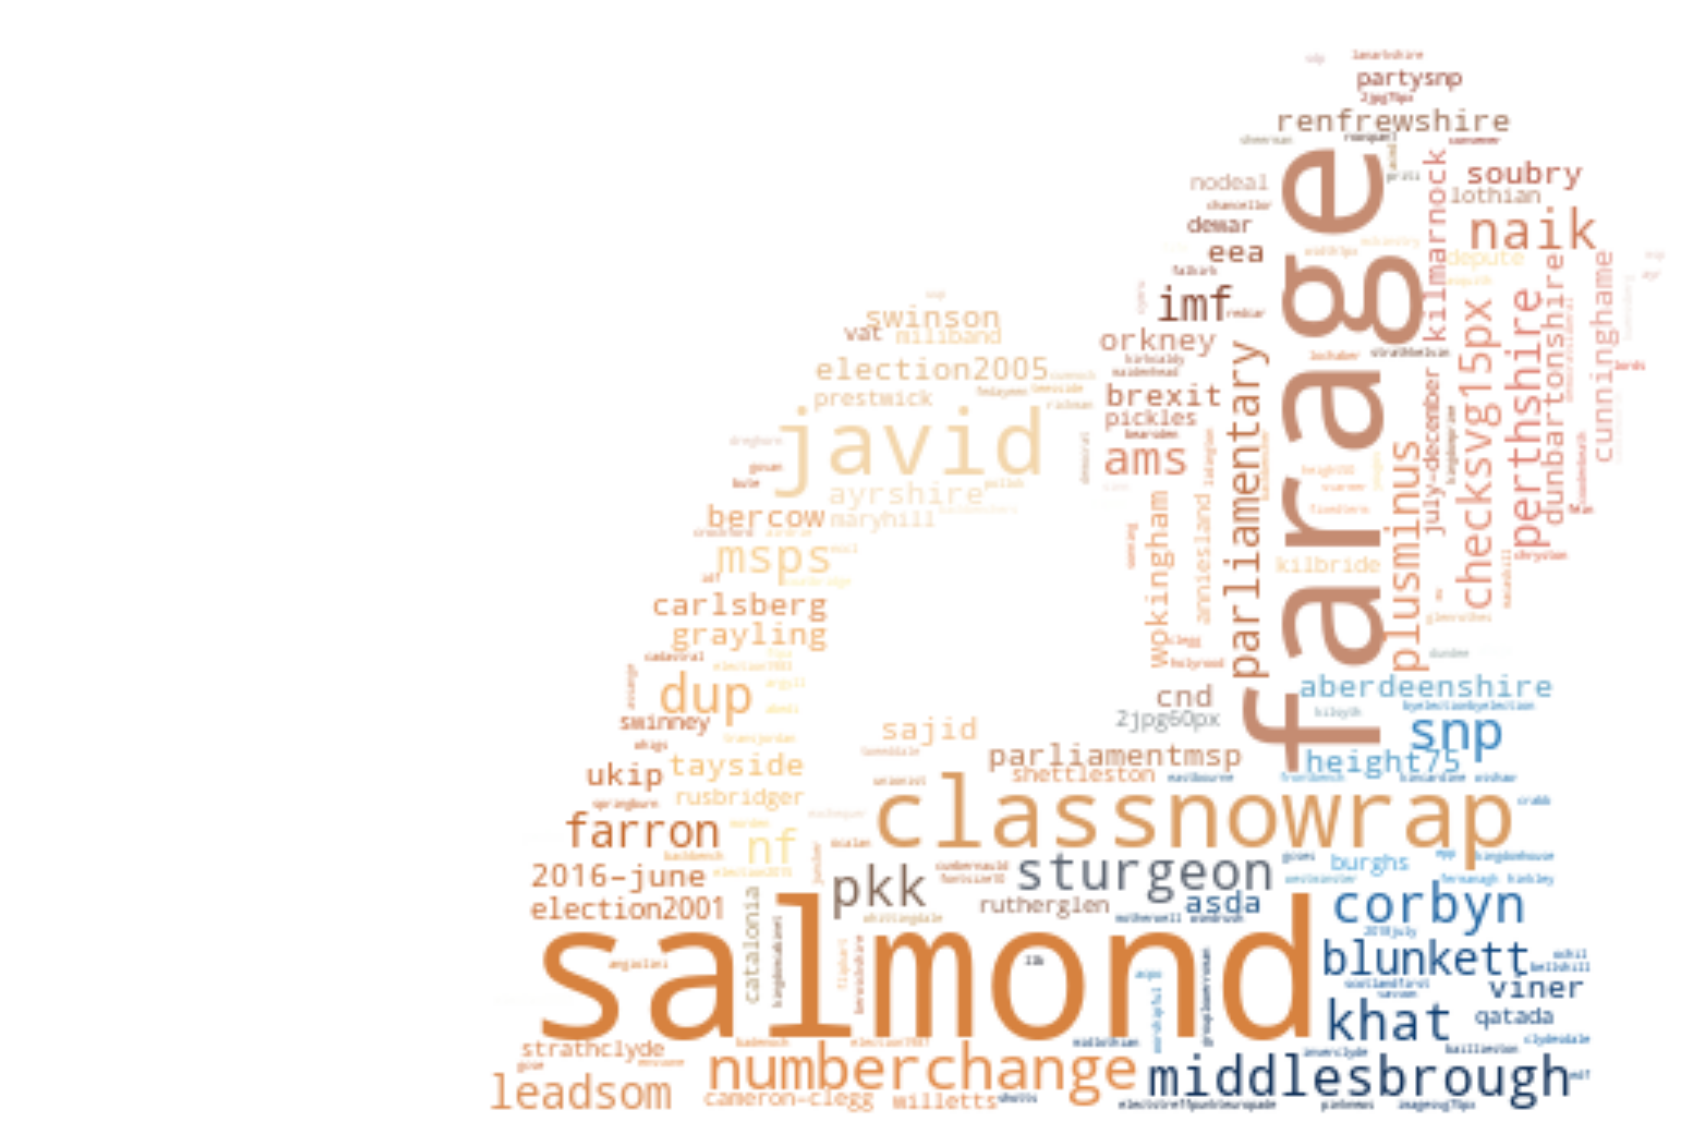

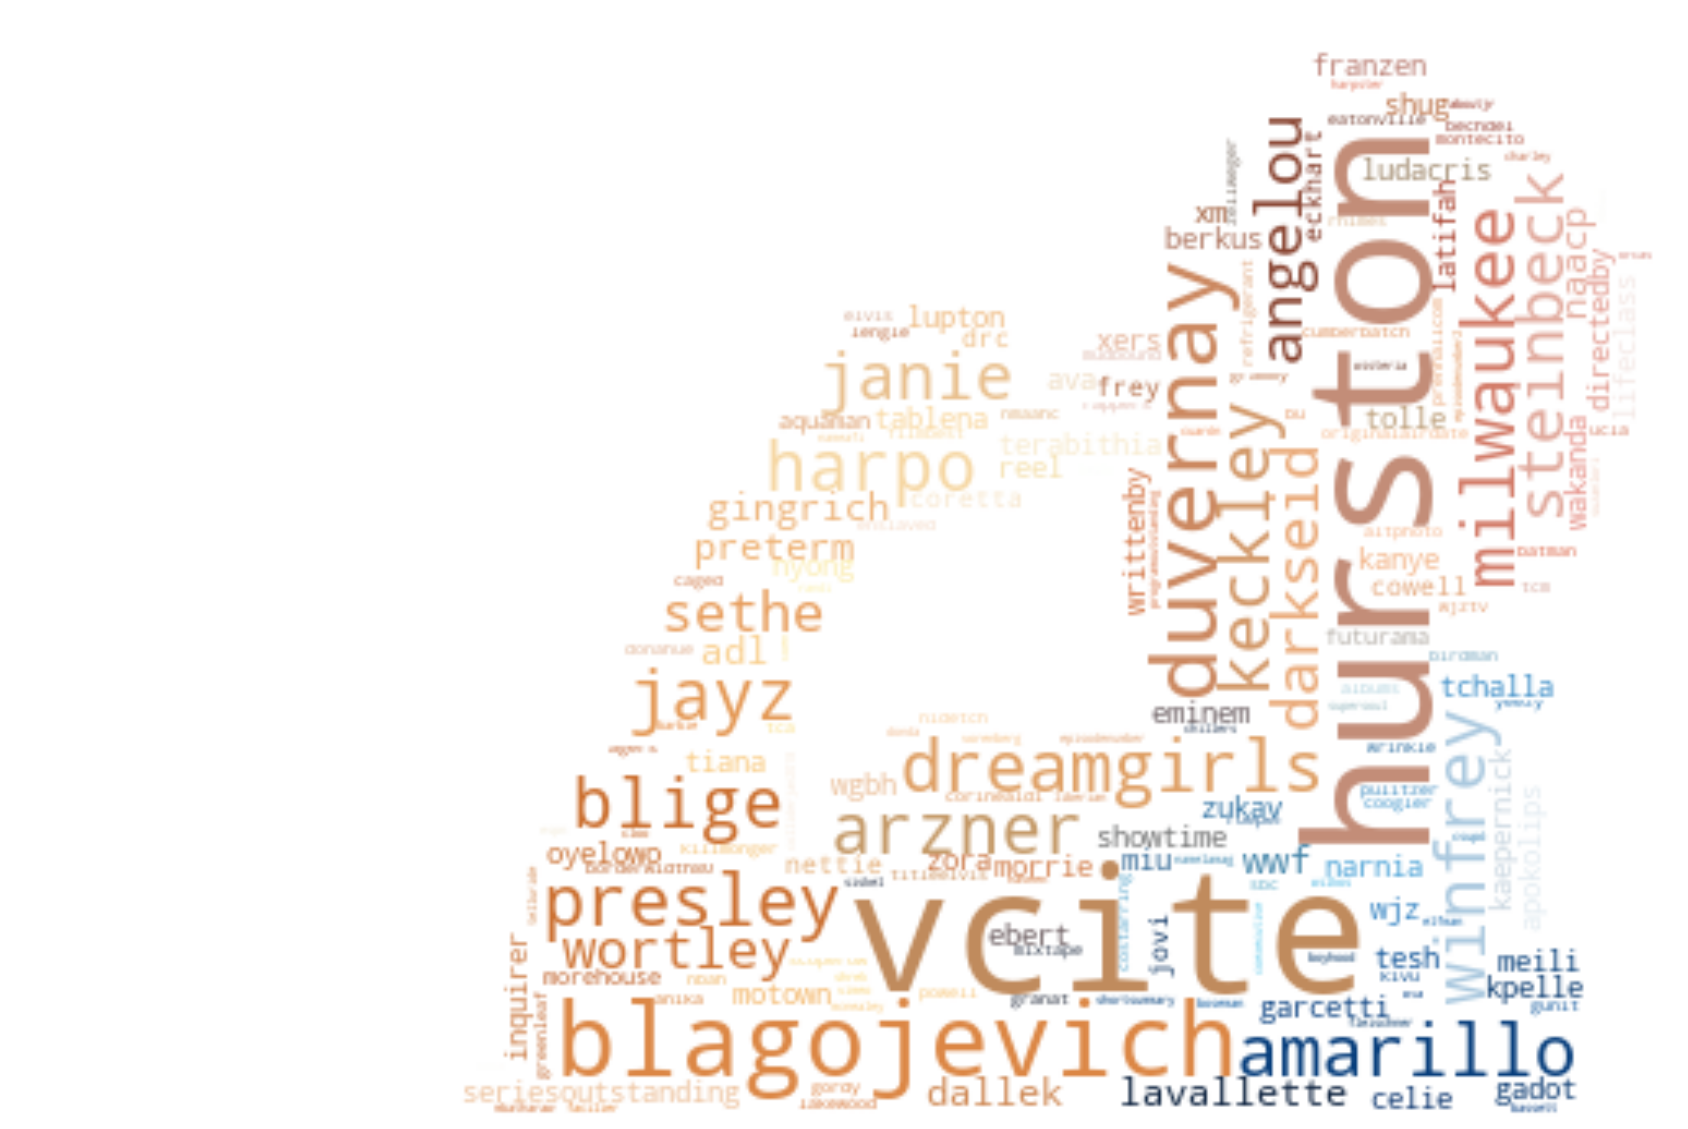

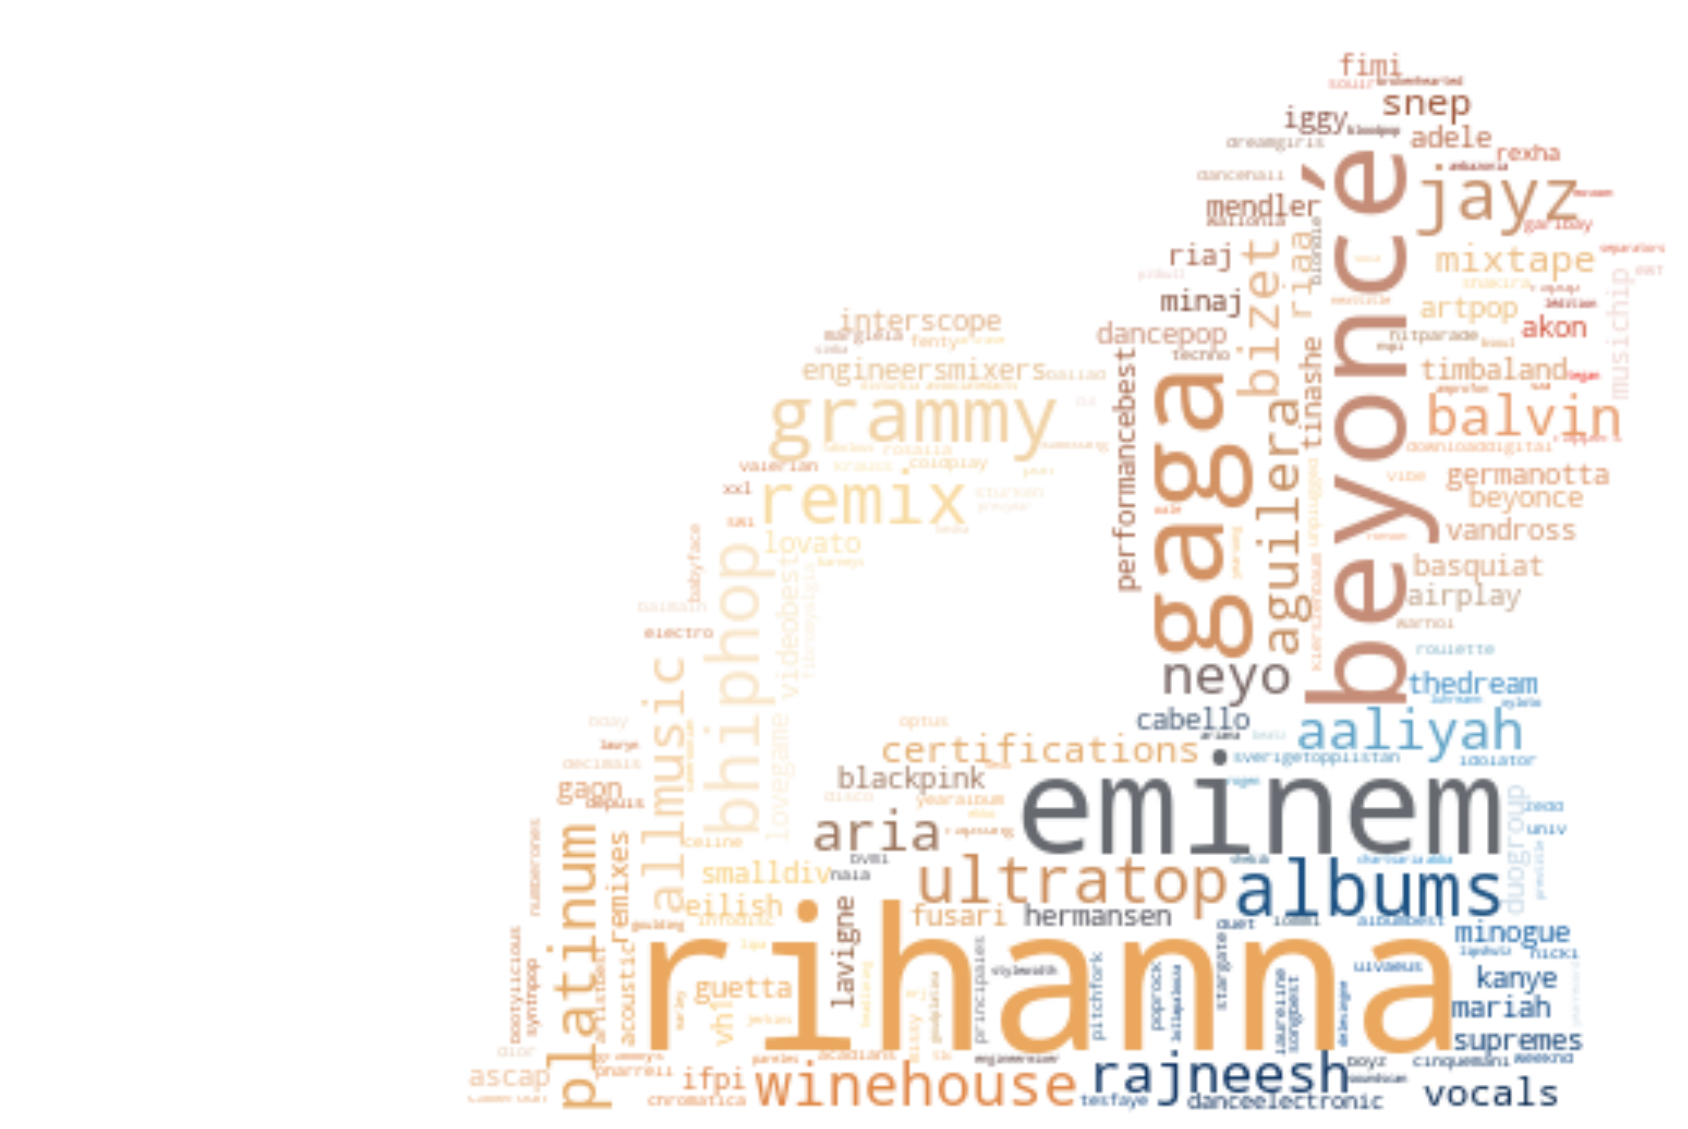

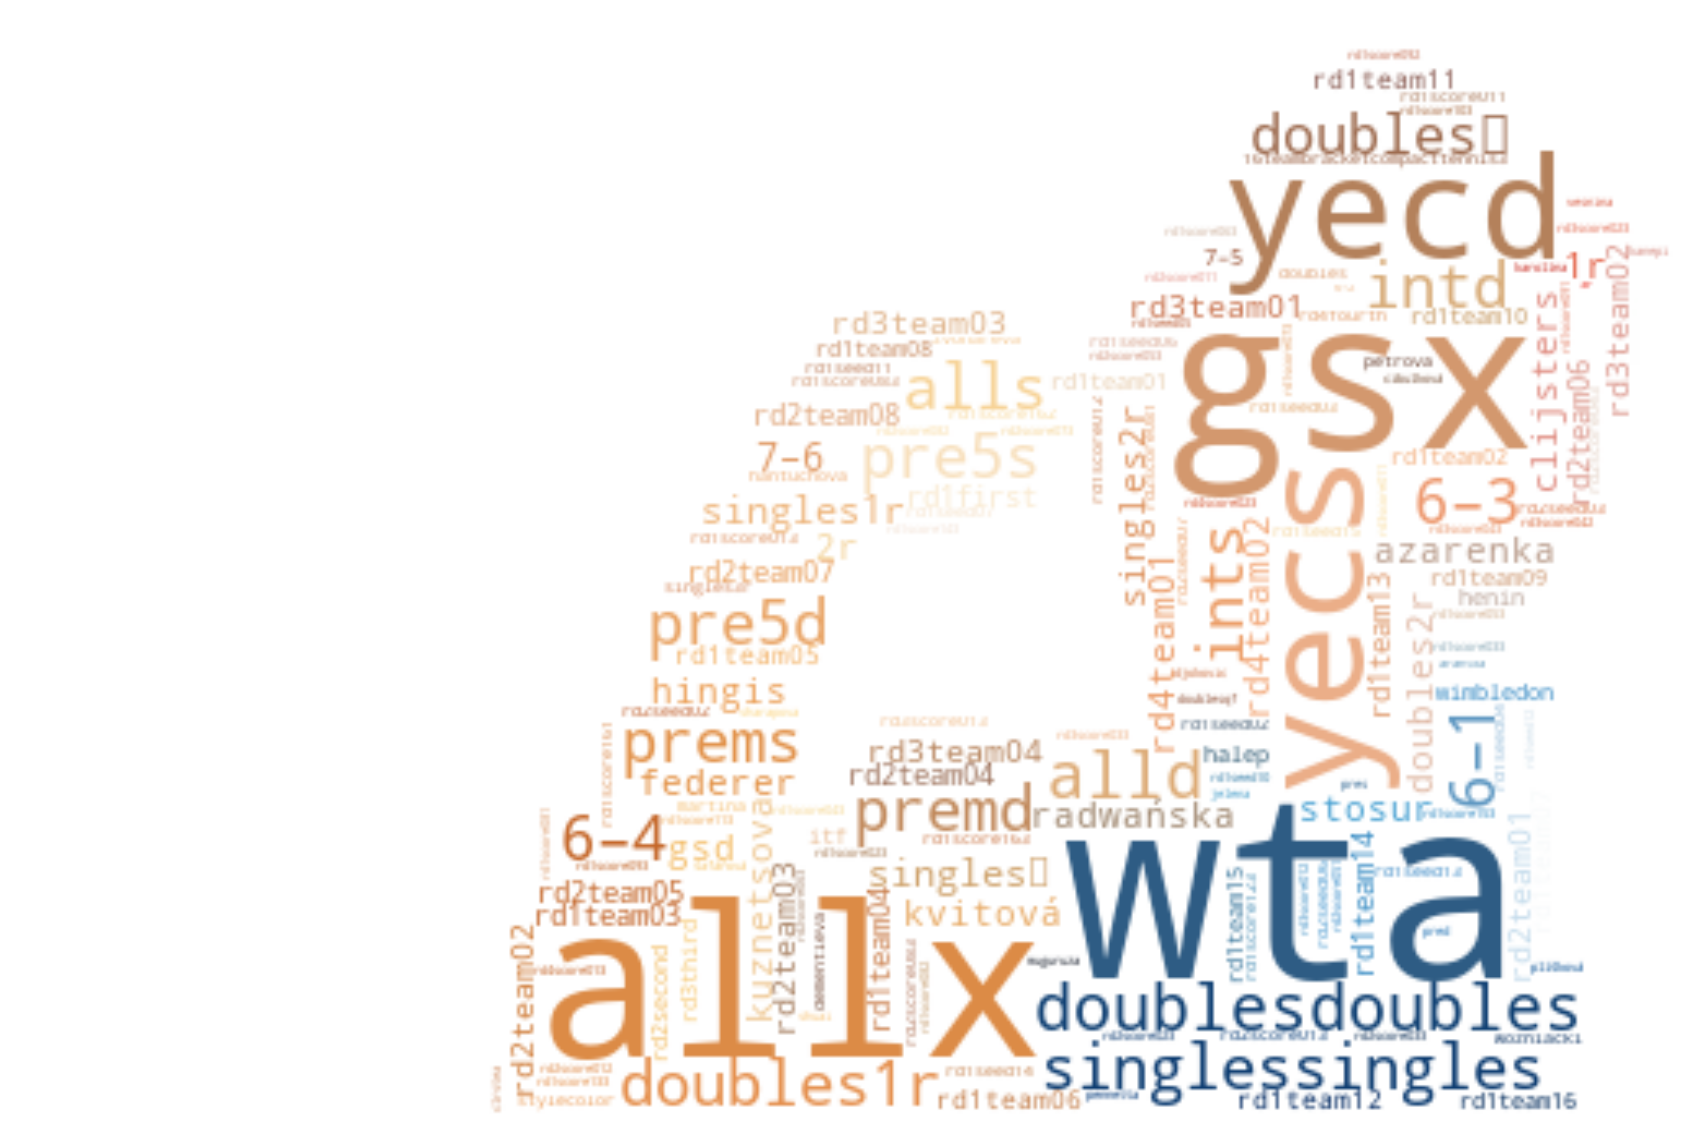

In [82]:
tf_idf_communities = tf_idf(word_lists,N)

#ATH take out path
mask = np.array(Image.open('C:/Users/fanndis/Documents/MSc in Busniess Analytics/Social Graphs/fanndis.github.io/wordcloud_background.jpg'))
mask_colors = ImageColorGenerator(mask)

for i in range(6):
    wordcloud = wc.WordCloud(
                          stopwords=wc.STOPWORDS,
                          mask=mask,
                          collocations=False,
                          background_color = 'white',
                          width=mask.shape[1],
                          height=mask.shape[0], 
                          color_func=mask_colors
                         ).generate_from_frequencies(tf_idf_communities[i])

    
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

 <font color = 'mediumBlue'> Finding and showing the most powerful women in the top 6 communities:

In [127]:
top6_com.sort()
for com in top6_com:
    counter = 0
    com_wom_list = []
    for i in all_community_list[com]:
        if i in [i.lower() for i in women_list]:
            com_wom_list.append(i)
            counter = counter +1
    print('Number of powerful women in community ',str(com),': ',counter)
    print('The women in the list:',com_wom_list)

Number of powerful women in community  0 :  39
The women in the list: ['abigail_johnson', 'adena_friedman', 'aileen_lee', 'amy_hood', 'angela_braly', 'anne_finucane', 'sheila_bair', 'anne_m._mulcahy', 'anne_wojcicki', 'brenda_c._barnes', 'cynthia_carroll', 'dana_walden', 'donna_langley', 'gail_koziara_boudreaux', 'jane_fraser', 'jennifer_nicholson_salke', 'jessica_uhl', 'julie_sweet', 'kathleen_kennedy', 'kirsten_green', 'lam_wai_ying', 'laurene_powell_jobs', 'lee_boo-jin', 'lynn_good', 'margarita_louis-dreyfus', 'mary_meeker', 'meg_whitman', 'melanie_kreis', 'patricia_a._woertz', 'phebe_novakovic', 'ruth_porat', 'safra_catz', 'sallie_krawcheck', 'shari_redstone', 'sheryl_sandberg', 'stacey_cunningham', 'susan_wojcicki', 'tricia_griffith', 'zoe_cruz']
Number of powerful women in community  1 :  1
The women in the list: ['hillary_clinton']
Number of powerful women in community  7 :  5
The women in the list: ['ana_botín', 'judith_mckenna', 'katharine_viner', 'nicola_sturgeon', 'theresa_m

## <font color = 'mediumBlue'> PUT THE COMMUNITY EXPLANATIONS HERE WHICH ARE ON THE WEBSITE

## <font color = 'mediumBlue'> Sentiment Analysis
    
### <font color = 'mediumBlue'> Sentiment Analysis using the wikpedia data

<font color = 'mediumBlue'> A sentiment Analysis will now be performed on the women. As has been already stated in the course, using wikipedia articles to sentiment analyse might not be the best tool since the wikipedia articles are written quite neutrally. Therefore the wikipedia text will first be analysed and then the twitter feed of each women will also be analysed. An added bonus is that twitter also generates a lot of other useful data, such as the hashtags the women have been using suggesting their interests and passions. Each tweet gathered also comes with the number of times people have favourited a tweet and retweeted which can be analysed to see which women are the most popular among the public.

Tweepy API has been used to gather the latest tweets of all the woman who had a twitter account, in total 58 women. 

First the sentiment analysis is performed on the wikipedia pages.

A word list is used that gives positive and negative words a happiness average. That list is first gathered and put into a dataframe.

In [2]:
# Gather the data
sentiment_data = 'https://journals.plos.org/plosone/article/file?id=10.1371/journal.pone.0026752.s001&type=supplementary'

# Create a dataframe called word_list containing the sentiment data
word_list = pd.read_csv(sentiment_data, sep = '\t', header = 2)
word_list.head()

word  happiness_rank  happiness_average  happiness_standard_deviation  \
0   laughter               1               8.50                        0.9313   
1  happiness               2               8.44                        0.9723   
2       love               3               8.42                        1.1082   
3      happy               4               8.30                        0.9949   
4    laughed               5               8.26                        1.1572   

  twitter_rank google_rank nyt_rank lyrics_rank  
0         3600          --       --        1728  
1         1853        2458       --        1230  
2           25         317      328          23  
3           65        1372     1313         375  
4         3334        3542       --        2332

<font color = 'mediumBlue'> A function is then created that will take in the tokenized text of each woman and calculate the given sentiment for that text.

In [3]:
# Function that calculates sentiment given a list of tokens
def sentiment(tokens):
    return pd.DataFrame(tokens, columns = ['word']).merge(word_list, on = 'word').happiness_average.mean()

<font color = 'mediumBlue'> Then the wikipedia articles of each women is loaded, tokenized and the sentiment calculated.

<font color = 'mediumBlue'> The stopwords package is loaded since stopwords will be removed

In [4]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rebekkaormslev/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<font color = 'mediumBlue'> Before the sentiment of the text is calculated the text needs to be prepared. First the text is tokenized and the punctuation is removed. Finally the text is all changed to lowercase. 

In [5]:
# Make a function to tokenize a given text
def tokenize(text):
    text = word_tokenize(text)
    text = list(filter(lambda token: token not in string.punctuation, text)) # Remove punctuation
    text = [w.lower() for w in text]
    return text

<font color = 'mediumBlue'> The wikipedia pages are then loaded.

In [6]:
import glob

path = '/Users/rebekkaormslev/Documents/GitHub/fanndis.github.io/women_wiki/'
file_path = os.listdir(path)

sent = []
woman = []
text_tokens = []

for i in file_path:
    try:
        p = path + i
        f = open(p,encoding = "utf-8")
        raw_text = f.read()
        tokenized_text = tokenize(raw_text)
        women_dataframe = pd.DataFrame({'word': tokenized_text})
        women_dataframe.head()
        s = sentiment(women_dataframe)
        sent.append(s)
        woman.append(i)
        text_tokens.append(tokenized_text)
    except:
        print('Encountered error')

In [7]:
wiki_sentiment = pd.DataFrame({'Woman': woman,'Tokenized text' : text_tokens,'Sentiment': sent})
wiki_sentiment['Woman'] = wiki_sentiment['Woman'].map(lambda x: x.rstrip('.txt'))
wiki_sentiment['Woman'] = wiki_sentiment['Woman'].map(lambda x: x.replace('_', ' '))
wiki_sentiment.head()

Woman                                     Tokenized text  \
0               Aileen Lee  [infobox, person, name, aileen, lee, image, =f...   
1   Nguyễn Thị Phương Thảo  [about|the, vietnamese, businesswoman|the, sin...   
2          Irene Rosenfeld  [use, mdy, dates|date=september, 2015, infobox...   
3  Eliza Manningham-Buller  [engvarb|date=december, 2013, use, dmy, dates|...   
4                Lady Gaga  [pp-move-indef, pp-blp|small=yes, short, descr...   

   Sentiment  
0   5.647631  
1   5.603917  
2   5.590589  
3   5.369474  
4   5.671820

<font color = 'mediumBlue'> Plot the frequency of the sentiment values

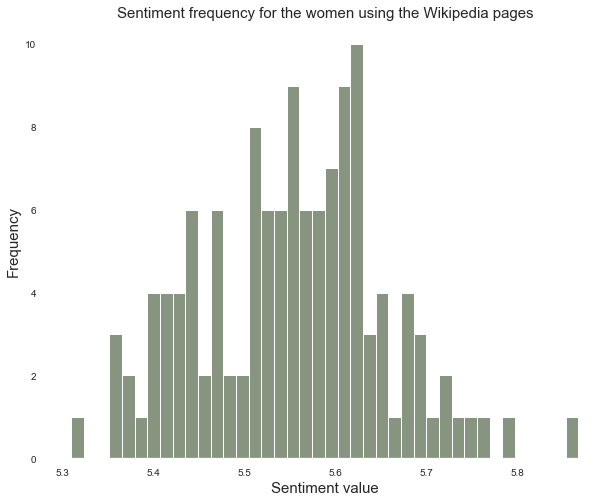

In [15]:
# Create a histogram of all women wik page sentiments
plt.figure(figsize = [10,8])
plt.hist(wiki_sentiment['Sentiment'], bins = 40, color = '#87947f')
plt.grid(axis = 'y', alpha = 0.75)
plt.xlabel('Sentiment value', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Sentiment frequency for the women using the Wikipedia pages', fontsize = 15)
plt.show();

<font color = 'mediumBlue'> **Figure** As can be seen in the figure all the wikipedia articles have around the same sentiment value. This could be because, as has been stated above wikipedia pages are often written quite neutral. It is however interesting to see what word do set the women apart so a word cloud will be made for the 10 most positive and the 10 most negative women.

## <font color = 'mediumBlue'> Women with the most positive sentiment according to Wikipedia

In [29]:
wiki_sentiment[['Woman', 'Sentiment']].nlargest(10, 'Sentiment').reset_index(drop = True)

Woman  Sentiment
0      Jennifer Lee   5.866716
1      Jane Jie Sun   5.783396
2  Kathleen Kennedy   5.756000
3   Judith Faulkner   5.745888
4     Kirsten Green   5.727538
5      Lam Wai Ying   5.724462
6        Julie Swee   5.719519
7     Güler Sabancı   5.710839
8     Donna Langley   5.695038
9       Taylor Swif   5.692107

## <font color = 'mediumBlue'> Women with the most negative sentiment according to Wikipedia

In [30]:
wiki_sentiment[['Woman', 'Sentiment']].nsmallest(10, 'Sentiment').reset_index(drop=True)

Woman  Sentiment
0    Ellen Jamison Kullman   5.160000
1            Judy Faulkner   5.180000
2  Gloria Macapagal Arroyo   5.309715
3         Yulia Tymoshenko   5.351559
4           Dilma Rousseff   5.360116
5              Sri Mulyani   5.360635
6  Eliza Manningham-Buller   5.369474
7      Sandra Day O'Connor   5.374769
8             Nancy Pelosi   5.378303
9            Sheikh Hasina   5.394789

<font color = 'mediumBlue'> The two tables above show the sentiment values for the women according to their wikipedia pages. As can be seen the pages all have around a 5 in sentiment which is most likely because the wikipedia pages tend to be written quite neutrally. For comparison the twitter feeds of the women will also be gathered and another sentiment analysis performed to compare the two.

## <font color = 'mediumBlue'> TWITTER DATA

<font color = 'mediumBlue'> Another sentiment analysis is performed on the twitter accounts of the women. Unfortunately only 58 women have a twitter account that is most definitely theirs, that is if the twitter account was not verified by twitter it is not included in the analysis. Also only personalized accounts are used, that means that for example Queen Elizabeth II does not have an account for the analysis even though there is an account for the Royal Family. Tweepy is used to gather as many tweets as possible from each woman. Since Tweepy requires the twitter username of each person instead of their full name the data gathering was done manually using the following code which was found using this site: https://gist.github.com/seankross/9338551

<font color = 'mediumBlue'> Get the tweets from the women

In [18]:
import glob

path = '/Users/rebekkaormslev/Documents/GitHub/fanndis.github.io/twitter_rett/'
file_path = os.listdir(path)

data = []

for i in file_path:
    p = path + i
    try:
        df = pd.read_csv(p, index_col=None, header=0)
        df['Woman'] = i 
        data.append(df)
    except:
        print('Encountered error')

twitter = pd.concat(data, axis=0, ignore_index=False, sort = False)

Encountered error
Encountered error


<font color = 'mediumBlue'> As can be seen two of the twitter pages where not added because of an error. Since there was only an error on two pages this will be ignored

<font color = 'mediumBlue'> Next the Woman name column in the dataframe is cleaned.

In [19]:
twitter = twitter.drop(['Unnamed: 0'], axis=1)

In [20]:
twitter['Woman'] = twitter['Woman'].map(lambda x: x.rstrip('.csv'))
twitter['Woman'] = twitter['Woman'].map(lambda x: x.replace('_', ' '))

In [21]:
twitter

id           created_at  favorites  retweets retweeted  \
0     1.333875e+18  2020-12-01 20:47:12       13.0       1.0     False   
1     1.289406e+18  2020-08-01 03:40:05        0.0      20.0     False   
2     1.285900e+18  2020-07-22 11:30:11        0.0       6.0     False   
3     1.285900e+18  2020-07-22 11:30:07        0.0       9.0     False   
4     1.285791e+18  2020-07-22 04:15:22        4.0       0.0     False   
...            ...                  ...        ...       ...       ...   
3210  3.467747e+17  2013-06-17 23:41:41       30.0      68.0     False   
3211  3.456103e+17  2013-06-14 18:34:55       63.0     222.0     False   
3212  3.448959e+17  2013-06-12 19:15:58       43.0     136.0     False   
3213  3.448786e+17  2013-06-12 18:07:09       13.0      27.0     False   
3214  3.441888e+17  2013-06-10 20:26:15       42.0      81.0     False   

                     source  \
0        b'Twitter Web App'   
1     b'Twitter for iPhone'   
2     b'Twitter for iPhone'   
3     b'Twitter for iPhone'   
4     b'Twitter for iPhone'   
...                     ...   
3210           b'Hootsuite'   
3211           b'Hootsuite'   
3212           b'Hootsuite'   
3213           b'Hootsuite'   
3214           b'Hootsuite'   

                                                   text                  Woman  
0     b"I was honored to be a judge for @Forbes' #30...  ellen jamison kullman  
1     b'RT @BloombergLive: .@BloombergTV\xe2\x80\x99...  ellen jamison kullman  
2     b'RT @Carbon: We\'re thrilled to share that ou...  ellen jamison kullman  
3     b"RT @Carbon: We're so proud of our CEO, @Elle...  ellen jamison kullman  
4           b'@Joseph_DeSimone @Carbon Thank you, Joe!'  ellen jamison kullman  
...                                                 ...                    ...  
3210  b'Can the #design of a medical record save liv...    melinda french gate  
3211  b"This #FathersDay, let's pay tribute to all t...    melinda french gate  
3212  b'"Every child, no matter where they\'re from,...    melinda french gate  
3213  b"Moms? Malaria? Show your influence: @CNN's n...    melinda french gate  
3214  b'Our 1st Catapult project has funded\xe2\x80\...    melinda french gate  

[108093 rows x 8 columns]

<font color = 'mediumBlue'> Get the hashtags, they could be interesting

In [22]:
twitter['hashtag'] = twitter['text'].apply(lambda x: re.findall(r"#(\w+)", x))

<font color = 'mediumBlue'> Plot the frequency of the hashtags

In [23]:
import itertools
hashtags = list(itertools.chain.from_iterable(twitter['hashtag']))

In [24]:
from collections import Counter

counting_hashtags = Counter(hashtags)

most_common_hashtags = counting_hashtags.most_common(30) 

hashtag = [item[0] for item in most_common_hashtags]
frequency = [item[1] for item in most_common_hashtags]

In [25]:
pip install pandas bokeh pyproj

Note: you may need to restart the kernel to use updated packages.


In [26]:
import pandas as pd
import numpy as np
from bokeh.plotting import figure
from bokeh.io import output_notebook, show, output_file
from bokeh.models import ColumnDataSource, HoverTool, Panel
from bokeh.models.widgets import Tabs
from bokeh.embed import components


<font color = 'mediumBlue'> The Bokeh plot function was used to make the hashtag graph. Since this was quite time consuming the rest of the plots will be made using the more traditional matplotlib graph

In [27]:
import math
#output_file("twitterhashtag.html")

p = figure(x_range=hashtag, plot_height=400, title="Twitter hashtags",
           toolbar_location=None, tools = 'hover' ) 

p.vbar(x=hashtag, top=frequency, width=0.9, color='#87947f')

hover = p.select(dict(type=HoverTool))
hover.tooltips = [('Frequency',' @top')]

p.xgrid.grid_line_color = None
p.y_range.start = 0
p.xaxis.major_label_orientation = 1.3
show(p)

plot_script, plot_div = components(p)

In [28]:
plot_script

'\n<script type="text/javascript">\n  (function() {\n    var fn = function() {\n      Bokeh.safely(function() {\n        (function(root) {\n          function embed_document(root) {\n            \n          var docs_json = \'{"3d7ec002-d645-4ac6-81cb-8db0aeb0f2a0":{"roots":{"references":[{"attributes":{"source":{"id":"1024","type":"ColumnDataSource"}},"id":"1028","type":"CDSView"},{"attributes":{"dimension":1,"ticker":{"id":"1017","type":"BasicTicker"}},"id":"1020","type":"Grid"},{"attributes":{},"id":"1008","type":"CategoricalScale"},{"attributes":{},"id":"1034","type":"UnionRenderers"},{"attributes":{"data_source":{"id":"1024","type":"ColumnDataSource"},"glyph":{"id":"1025","type":"VBar"},"hover_glyph":null,"muted_glyph":null,"nonselection_glyph":{"id":"1026","type":"VBar"},"selection_glyph":null,"view":{"id":"1028","type":"CDSView"}},"id":"1027","type":"GlyphRenderer"},{"attributes":{"callback":null,"start":0},"id":"1006","type":"DataRange1d"},{"attributes":{},"id":"1033","type":"Ca

<font color = 'mediumBlue'> Next, the tweets from the women are cleaned since they will be used for the senitment analysis.

In [29]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [30]:
from bs4 import BeautifulSoup

#data cleaning

def tweets_clean(tweet, options):
    if options['lower']:
        tweet = tweet.lower()
    if options['decode_html']:
        txt = BeautifulSoup(tweet, 'lxml')
        tweet = txt.get_text()
    if options['noURL']:
        tweet = tweet.replace('http\S+|www.\S+', '')
    if options['noRT']:
        tweet = tweet.replace('rt :', '')  
    if options['noMentions']:
        tweet = re.sub("@[A-Za-z0-9]+","",tweet)
    if options['noHash']:
        tweet = tweet.replace('#', '')
    return tweet
clean_config = {
    'noURL': True,
    'noMentions': True,
    'decode_html': True,
    'lower': True,
    'noRT' : True,
    'noHash' : True
    }

In [31]:
twitter['clean_text'] = twitter['text'].apply(tweets_clean, args=(clean_config,))

In [32]:
twitter.head()

id           created_at  favorites  retweets retweeted  \
0  1.333875e+18  2020-12-01 20:47:12       13.0       1.0     False   
1  1.289406e+18  2020-08-01 03:40:05        0.0      20.0     False   
2  1.285900e+18  2020-07-22 11:30:11        0.0       6.0     False   
3  1.285900e+18  2020-07-22 11:30:07        0.0       9.0     False   
4  1.285791e+18  2020-07-22 04:15:22        4.0       0.0     False   

                  source                                               text  \
0     b'Twitter Web App'  b"I was honored to be a judge for @Forbes' #30...   
1  b'Twitter for iPhone'  b'RT @BloombergLive: .@BloombergTV\xe2\x80\x99...   
2  b'Twitter for iPhone'  b'RT @Carbon: We\'re thrilled to share that ou...   
3  b'Twitter for iPhone'  b"RT @Carbon: We're so proud of our CEO, @Elle...   
4  b'Twitter for iPhone'        b'@Joseph_DeSimone @Carbon Thank you, Joe!'   

                   Woman      hashtag  \
0  ellen jamison kullman  [30Under30]   
1  ellen jamison kullman           []   
2  ellen jamison kullman           []   
3  ellen jamison kullman           []   
4  ellen jamison kullman           []   

                                          clean_text  
0  b"i was honored to be a judge for ' 30under30 ...  
1  b'rt : .\xe2\x80\x99s  and \'s  talk about fem...  
2  b'rt : we\'re thrilled to share that our ceo, ...  
3  b"rt : we're so proud of our ceo, , for being ...  
4                      b'_desimone  thank you, joe!'

<font color = 'mediumBlue'>  After the tweets have been cleaned they need to be tokenized. Before the tweets are tokenized they are combined so each woman has a list of words

In [36]:
tweety = twitter[['Woman','clean_text']]

In [37]:
tweety

Woman                                         clean_text
0     ellen jamison kullman  b"i was honored to be a judge for ' 30under30 ...
1     ellen jamison kullman  b'rt : .\xe2\x80\x99s  and \'s  talk about fem...
2     ellen jamison kullman  b'rt : we\'re thrilled to share that our ceo, ...
3     ellen jamison kullman  b"rt : we're so proud of our ceo, , for being ...
4     ellen jamison kullman                      b'_desimone  thank you, joe!'
...                     ...                                                ...
3210    melinda french gate  b'can the design of a medical record save live...
3211    melinda french gate  b"this fathersday, let's pay tribute to all th...
3212    melinda french gate  b'"every child, no matter where they\'re from,...
3213    melinda french gate  b"moms? malaria? show your influence: 's new c...
3214    melinda french gate  b'our 1st catapult project has funded\xe2\x80\...

[108093 rows x 2 columns]

In [38]:
twitter_grouped = tweety.groupby('Woman')['clean_text'].apply(str).reset_index()

In [40]:
twitter_grouped.head()

Woman                                         clean_text
0    adena friedman  0       b'rt : "we focused on disclosure as th...
1        aileen lee  0       b'_herrera   feel the same... so so gr...
2  amina j mohammed  0       b'did you know that a teaspoon of heal...
3         ana botin  0      b'interesting debate on a very relevant...
4     anne finucane  0      b'38m people are living with hiv/aids a...

<font color = 'mediumBlue'> The text is then tokenized

In [46]:
def twitter_tokenize(text):
    text = text.replace('\d+', '') #remove numbers 
    text = word_tokenize(text) #Tokenize the text
    text = list(filter(lambda token: token not in string.punctuation, text)) # Remove punctuation
    return text

In [47]:
twitter_grouped['tokenized'] = twitter_grouped['clean_text'].apply(lambda x: twitter_tokenize(x))

In [48]:
tweety = twitter_grouped[['Woman','tokenized']]

In [50]:
tweety.head()

Woman                                          tokenized
0    adena friedman  [0, b'rt, ``, we, focused, on, disclosure, as,...
1        aileen lee  [0, b'_herrera, feel, the, same, ..., so, so, ...
2  amina j mohammed  [0, b'did, you, know, that, a, teaspoon, of, h...
3         ana botin  [0, b'interesting, debate, on, a, very, releva...
4     anne finucane  [0, b'38m, people, are, living, with, hiv/aids...

<font color = 'mediumBlue'> The sentiment for the tweets can now be calculated

In [51]:
sentiment_data = []
for index,row in tweety.iterrows():
    try:
        text = row['tokenized']
        tweet_data = pd.DataFrame({'word': text})
        s = sentiment(tweet_data)
        sentiment_data.append(s)
    except:
        print(f'Didn\'t work for {index}')

In [52]:
sentiment_df = pd.DataFrame({'sentiment':sentiment_data})

In [53]:
tweety['sentiment'] = sentiment_df['sentiment']

In [54]:
tweety = tweety.sort_values(by='sentiment', ascending=False).reset_index()
tweety.head()

index                Woman  \
0     30            lady gaga   
1     31           laura bush   
2     47       serena william   
3     43    reese witherspoon   
4     44  robyn rihanna fenty   

                                           tokenized  sentiment  
0  [0, b'thank, you, for, all, of, the, amazing, ...   5.860377  
1  [0, b'join, me, in, supporting, the, salvation...   5.832857  
2  [0, b'rt, athlete, entrepreneur, investor, and...   5.810278  
3  [0, b'matching, pj, sets, count, as, business,...   5.795349  
4  [0, b'woke, up, feeling, like, a, sunday, in, ...   5.782791

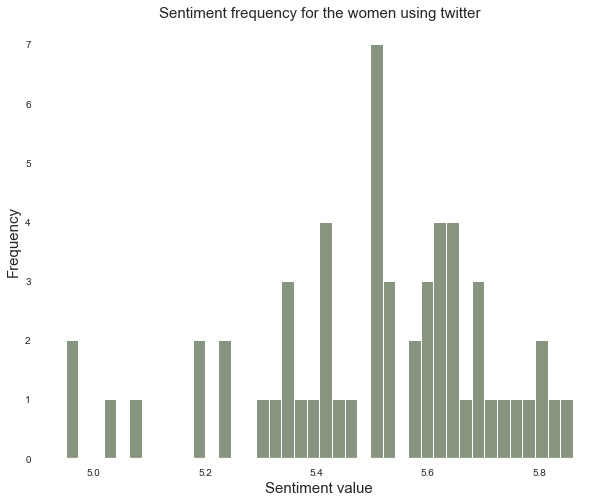

In [55]:
# Create a histogram of the women twitter feed sentiments
plt.figure(figsize = [10,8])
plt.hist(tweety['sentiment'], bins = 40, color = '#87947f')
plt.grid(axis = 'y', alpha = 0.75)
plt.xlabel('Sentiment value', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Sentiment frequency for the women using twitter', fontsize = 15)
plt.show();

<font color = 'mediumBlue'> How interesting! The sentiments for the twitter feeds also have a relatively similar sentiment value. This is not what was expected since twitter is a more free site for people to voice their opinions. The twitter feeds of some of the women was looked through to confirm this analysis and it could be seen that the women tend to stay quite neutral in their tweets and not talk about topics that tend to be controversial.


## <font color = 'mediumBlue'> Women with the most positive sentiment according to Twitter

In [103]:
#Happiest
tweety[['Woman', 'sentiment']].nlargest(10, 'sentiment').reset_index(drop = True)

Woman  sentiment
0            lady gaga   5.860377
1           laura bush   5.832857
2       serena william   5.810278
3    reese witherspoon   5.795349
4  robyn rihanna fenty   5.782791
5      nicola sturgeon   5.750667
6       judith mckenna   5.744426
7       stacey cunning   5.715517
8        anne finucane   5.695000
9              beyonce   5.692527


## <font color = 'mediumBlue'> Women with the most negative sentiment according to Twitter

In [104]:
#saddest
tweety[['Woman', 'sentiment']].nsmallest(10, 'sentiment').reset_index(drop = True)

Woman  sentiment
0      sophie wilme   4.949565
1      rania nashar   4.963333
2    dilma rousseff   5.031071
3   isabelle kocher   5.068500
4      erna solberg   5.187742
5    paula santilli   5.191176
6      nancy pelosi   5.223704
7     anne wojcicki   5.226596
8    jacindaa rdern   5.300000
9  katharine viener   5.332857

<font color = 'mediumBlue'> Since the data is available it could be interesting to see what women have the most favourited tweet and the most retweets. Maybe these tweets could tell us more about the women, is she voicing her opinion on a subject that most people aggree on and therefore favourite the tweet or retweet it?

In [105]:
twitter_data = twitter[['Woman','favorites','retweets']]

In [56]:
twitter_most_popular = twitter_data.groupby("Woman").mean().reset_index()
twitter_most_popular.head()

NameError: name 'twitter_data' is not defined

## Most retweets

In [107]:
twitter_data[['Woman', 'retweets']].nlargest(10, 'retweets').reset_index(drop = True)

Woman   retweets
0      judith mckenna  2188818.0
1        ava duvernay   677868.0
2     hillary clinton   643113.0
3      susan wojcicki   643111.0
4      ellen degenere   465378.0
5        taylor swift   452202.0
6     hillary clinton   402984.0
7      michelle obama   402037.0
8      greta thunberg   382013.0
9  laurene powell job   372047.0

## Most favourites

In [109]:
twitter_data[['Woman', 'favorites']].nlargest(10, 'favorites').reset_index(drop = True)

Woman  favorites
0         taylor swift  2177479.0
1       greta thunberg  1857865.0
2      hillary clinton  1807806.0
3      hillary clinton  1422397.0
4       michelle obama  1390985.0
5  robyn rihanna fenty  1205432.0
6       michelle obama  1199345.0
7            lady gaga   962794.0
8  robyn rihanna fenty   936684.0
9       ellen degenere   900947.0

## Wordclouds from the most positive woman

In [119]:
from PIL import *

im = Image.open("twitter_logo.png")
bg_pic = np.asarray(im)

In [128]:
positive_woman_text = tweety.at[0,'tokenized']
positive_woman_text

['0',
 "b'thank",
 'you',
 'for',
 'all',
 'of',
 'the',
 'amazing',
 'chromatica',
 '...',
 '1',
 "b'\\xf0\\x9f\\x9a\\xa8",
 '\\xe2\\x80\\x9c911\\xe2\\x80\\x9d',
 '...',
 '2',
 "b'\\xf0\\x9f\\x9a\\xa8",
 '\\xe2\\x80\\x9c911\\xe2\\x80\\x9d',
 '...',
 '3',
 "b'\\xf0\\x9f\\x9a\\xa8",
 '\\xe2\\x80\\x9c911\\xe2\\x80\\x9d',
 '...',
 '4',
 "b'rt",
 'if',
 'you',
 'weren\\xe2\\x80\\x99t',
 'able',
 'to',
 'donat',
 '...',
 '...',
 '3124',
 "b'rt",
 'great',
 'day',
 'today',
 'with',
 'http',
 '//t.co/a',
 '...',
 '3125',
 'b',
 'it',
 'was',
 'so',
 'awesome',
 'working',
 'with',
 'you',
 'today',
 'i',
 '...',
 '3126',
 'b',
 "''",
 'always',
 'a',
 'good',
 'time',
 'with',
 'my',
 'buddy',
 'i',
 "'ll",
 'never',
 '...',
 '3127',
 "b'had",
 'a',
 'beautiful',
 'session',
 'with',
 'sir',
 'paul',
 'mccart',
 '...',
 '3128',
 'b',
 'your',
 'hands',
 'are',
 'beautiful',
 'like',
 'your',
 'soul',
 'a',
 '...',
 'Name',
 'lady',
 'gaga',
 'Length',
 '3129',
 'dtype',
 'object']

In [121]:
wc = WordCloud(mask=bg_pic, background_color='white', width = 300, height=300, margin=2)

text = '''

In [ ]:
from wordcloud import WordCloud
from PIL import Image
import numpy as np
im = Image.open("bg.png")
bg_pic = np.asarray(im)
'''
wc.generate(text)
wc.to_file('wc1.png')

## **4. Discussion. Think critically about your creation**

   * **What went well?**
   
   <font color = 'mediumBlue'> The data extractation went well. The experience from the course helped alot, which saved alot of time, since several code cells from the assignments only needed to be adjusted to the project. Additionally, the size of the network turned out to be much bigger than originally expected. The topic was interesting and the webpage configuration was more fun than expected. The project made it possible for the group to be creative in visualization and was easy to dig deeper when time allowed.

   * **What is still missing? What could be improved?, Why?**
   
   <font color = 'mediumBlue'> The data clean up could have gone much further if time would have allowed. Additionally, a more detailed stemming would have been really good for the network since it was hard to combine duplications when there were differences in the naming, for example, Yale University was also referred to as University of Yale. This means that if this stemming would have been done, more links would have been in the network.

    It would have been interesting to look into more twitter data as well. Since the twitter data only included tweets from around 60 women and did not include some comments and feedback from the followers which is believed that would have resulted in more variance for the sentiment analysis of the twitter data.
    

## **5. Contributions. Who did what?**
<br>
<font color = 'mediumBlue'>
    
* Extracting Little Sis data and pre data analysis for assignment A: Fanndís and Rebekka
* Video creation: Rebekka
* Website creation: Fanndís
* Website customization/content: Fanndís, Rebekka and Erla
* Extracting and cleaning wikipedia data: Erla
* Network analysis (visualisations, top connections, age and country): Erla
* Top 10 Similarity analysis: Fanndís
* Community Analysis: Fanndís
* Sentiment Analysis: Rebekka
* Twitter Analysis: Rebekka
 

## OLD STUFF

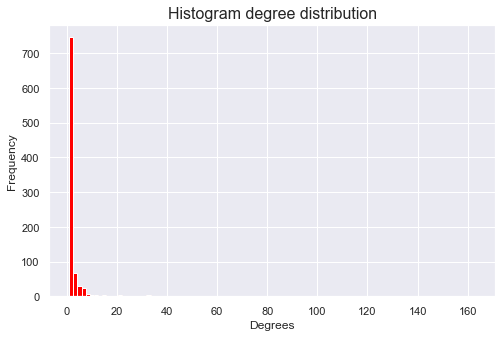

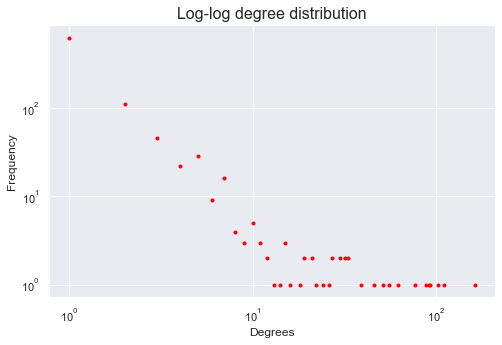

In [44]:
degrees = [largest_cc.degree(n) for n in largest_cc.nodes()]

"""
def Nmaxelements(list1, N): 
    final_list = [] 
  
    for i in range(0, N):  
        max1 = 0
          
        for j in range(len(list1)):      
            if list1[j] > max1: 
                max1 = list1[j]; 
                  
        list1.remove(max1); 
        final_list.append(max1) 
          
    print(final_list) 
    
Nmaxelements(degrees, 10)
"""

# Constructing a figure of histogram degree distributions
plt.figure(figsize = (8,5))
plt.hist(degrees, bins = 100, color = 'red')
#sns.distplot(degrees, bins = 100, kde = False, color = "red")
plt.title('Histogram degree distribution', fontsize = 16)
plt.xlabel('Degrees')
plt.ylabel('Frequency')

# Now a log-log plot
v = list(range(min(degrees), max(degrees) + 2))
hist = np.histogram(degrees, bins = v)

plt.figure(figsize = (8,5))
plt.loglog(list(hist[1][:-1]), list(hist[0]), '.', color = 'red')
plt.title('Log-log degree distribution', fontsize = 16)
plt.xlabel('Degrees')
plt.ylabel('Frequency')

plt.show()

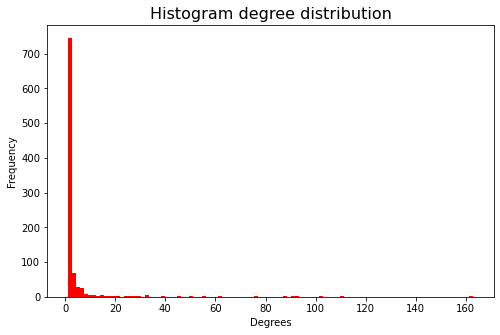

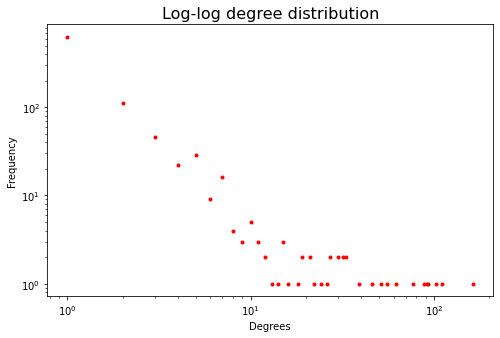

In [61]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
#sns.set()
sns.reset_orig()

degrees = [largest_cc.degree(n) for n in largest_cc.nodes()]

"""
def Nmaxelements(list1, N): 
    final_list = [] 
  
    for i in range(0, N):  
        max1 = 0
          
        for j in range(len(list1)):      
            if list1[j] > max1: 
                max1 = list1[j]; 
                  
        list1.remove(max1); 
        final_list.append(max1) 
          
    print(final_list) 
    
Nmaxelements(degrees, 10)
"""

# Constructing a figure of histogram degree distributions
plt.figure(figsize = (8,5))
plt.hist(degrees, bins = 100, color = 'red')
#sns.distplot(degrees, bins = 100, kde = False, color = "red")
plt.title('Histogram degree distribution', fontsize = 16)
plt.xlabel('Degrees')
plt.ylabel('Frequency')
plt.savefig('women_hist_deg_dist')

# Now a log-log plot
v = list(range(min(degrees), max(degrees) + 2))
hist = np.histogram(degrees, bins = v)

plt.figure(figsize = (8,5))
plt.loglog(list(hist[1][:-1]), list(hist[0]), '.', color = 'red')
plt.title('Log-log degree distribution', fontsize = 16)
plt.xlabel('Degrees')
plt.ylabel('Frequency')
plt.savefig('women_loglog_deg_dist')

plt.show()